## Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import os
import librosa
import librosa.display
import IPython.display as ipd

## Extracting audio features MFCCS

In [2]:
df1=pd.read_csv(r"I:\Covsound\COVDATA\20200413\20200413.csv")

In [3]:
df1

,id,l_c,a,covid_status,iF,ep,g,l_s,dT,l_l,diabetes,asthma,smoker,ht,fever
0,vK2bLRNzllXNeyOMudnNSL5cfpG2,India,24,healthy,True,y,male,Karnataka,web,NaN,NaN,NaN,NaN,NaN,NaN
1,bjA2KpSxneNskrLBeqi4bqoTDQl2,India,72,healthy,True,y,male,Maharashtra,web,Thane,NaN,NaN,NaN,NaN,NaN
2,FSzobvJqOXf0rI6X05cHqOiU9Mu2,India,54,healthy,True,y,male,Maharashtra,web,Thane West,NaN,NaN,NaN,NaN,NaN
3,EqDWckxbsETyHUeBLQ8jLtxlhir2,India,31,healthy,True,y,male,Karnataka,web,Bangalore,NaN,NaN,NaN,NaN,NaN
4,FGRDO4IBbAejR0WHD5YbkXTCasg2,India,26,healthy,True,y,male,Haryana,web,gurgaon,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,0zexHIcM7tQDdnFiEj2Eb0v3g212,India,29,healthy,True,y,male,Gujarat,web,Gandhinagar,NaN,NaN,NaN,NaN,NaN
72,uMry1yqi5sNoykw7ySJdITMv2yT2,India,28,resp_illness_not_identified,True,y,male,Karnataka,web,Bangalore,NaN,NaN,NaN,NaN,NaN
73,3VWhvtBFHKMgEKxlXzMYeg5NeBN2,India,37,healthy,True,y,male,Kerala,web,Trivandrum,NaN,NaN,NaN,NaN,NaN
74,xyDgyXrDoyXu5CFqcNe20LRjYqg1,India,26,no_resp_illness_exposed,True,y,female,Gujarat,web,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
audio_signal=[]

In [5]:
for i in df1.index:
    id = str(df1['id'][i])
    id = id.split("  ")
    id=id[-1][0:28]
    #print(id)
    for subdir, dirs, files in os.walk('I:/Covsound/COVDATA/20200413'):
        for filename in files:
            filepath = subdir + os.sep + filename
            #print(filepath)
            path=str(subdir)
            path=path.split("/")
            path=path[-1].split("\\")
            path=path[-1]
            #print(path)
            if(path == id):
                #print(id)
                if(filepath.endswith('cough-shallow.wav')):
                    try:
                        print(id)
                        audio, sample_rate = librosa.load(filepath, res_type='kaiser_fast')
                        mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
                        mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
                        mfccs_scaled_features =list(mfccs_scaled_features)
                        audio_signal.append(mfccs_scaled_features)
                        
                    except Exception as e:
                        print(e)
                        print(id)

vK2bLRNzllXNeyOMudnNSL5cfpG2
bjA2KpSxneNskrLBeqi4bqoTDQl2
FSzobvJqOXf0rI6X05cHqOiU9Mu2
EqDWckxbsETyHUeBLQ8jLtxlhir2
FGRDO4IBbAejR0WHD5YbkXTCasg2
htQzROl26OWQpIYFDzv11F79PLR2
pW9mCAeWYiMoM7wW7riLvNRbYDO2
Eu11s84cuBTiPXTAtVf9mj3GkqA2
L7S8iIPKgiO6QWLC3mGkROCMa0s1
eP8gEM0KcBU6S5JpMdycX74KP3p2
UiUUhL0PMjWVA6W2dKte1DCE6wG2
2TkAK2YVkYS7Ux3hAPBUgYgg9DI3
QQbzKidDxHQ0eZFEL4uG68s1lc02
9ypQNsTsSQYlx72wxTLrHzzNoAJ2
cfZUmZvsecYVKw5eSi4qIhfJVpI3
5ZDF98UQUxcVuS9VhaWxKlVnXvs1
tiKv850hJFTmpCAvfJOmOOqkeUs1
LqGeCxef4fN4IPanKEbWkO1fAwJ3
XUsJp0qysAPtu3vBI0UCiHRJhZ22
eZ9KEu3fmEgvxINqgcbkBXoEsv53
TRK6gUseEUS7dbF0soG80W1uLm53
Input signal length=0 is too small to resample from 16000->22050
TRK6gUseEUS7dbF0soG80W1uLm53
iq8oYXczSjPuJoVS7DBpkGNMC2p1
O4BFgxvAgwbwRGZMkMBJRFnGBbd2
nMIOAh7qRFf3pqbchclOLKbPDOm1
Pr79fov0a5TW5KPo0XACvIqMtO72
60Ig4PmU9NMqKGDMR8Um0Tc2KXB3
CrlV0ddIqdbtxNnkIhtPS5dvoX42
KL32QXSSnLZlRRT2B6rQQQKgpx12
tOlOwYDEHCRx1QegeMOPaydVcgv1
zvXkuEaPb0OEgG4EHx59NqdmamR2
9XKj7fAmvwPUas9GFPZuTpev7T03
Input s

In [6]:
len(audio_signal)

74

In [7]:
df2=pd.read_csv(r"I:\Covsound\COVDATA\20200415\20200415\20200415.csv")

In [8]:
df2

,id,date,l_c,a,ep,g,l_s,l_l,covid_status,diabetes,ht,asthma,fever,smoker,cld,ihd
0,UhGuA2vn7sUfKJRENR472IxQaEu2,2020-04-15T06:06:35.388Z,India,42,y,female,Karnataka,Varthur,healthy,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,jaNAcGlkQvUYEcRFXm5gNwnOOn93,2020-04-15T04:10:52.023Z,India,58,y,female,Karnataka,Bangalore,healthy,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IVUrhfpO08QnE9S8UR1hk4DquTa2,2020-04-13T15:02:41.909Z,United States,28,y,male,Pennsylvania,NaN,healthy,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,l6OFgjiE4MT6I6wfoYHk208nEaJ3,2020-04-15T02:28:41.973Z,India,45,y,male,Karnataka,Bangalore,resp_illness_not_identified,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,O9jPNdypMudWbGGiqtlgi4ae2er1,2020-04-14T07:01:56.462Z,India,46,y,female,Karnataka,Bengaluru,healthy,True,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,jsYI5hPpF3XJ6rW8EQjUTCfPNZ62,2020-04-13T15:35:13.388Z,India,32,y,male,Andhra Pradesh,Visakhapatnam,no_resp_illness_exposed,NaN,NaN,NaN,NaN,True,NaN,NaN
157,StMoprM57wPyrUs5p0s78r1X0Qt1,2020-04-15T03:07:31.302Z,India,51,y,male,Karnataka,Bengaluru,healthy,NaN,NaN,NaN,NaN,NaN,NaN,True
158,95XA3QmnULQ1KPlcdw4RDDKnBhH2,2020-04-14T13:18:18.158Z,India,26,y,male,Karnataka,NaN,healthy,NaN,NaN,NaN,NaN,NaN,NaN,NaN
159,mX9OLV39QwhCicc7VLqQyniNdU63,2020-04-13T14:55:50.320Z,India,32,y,male,Andhra Pradesh,Hyderabad,healthy,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
for i in df2.index:
    id = str(df2['id'][i])
    id = id.split("  ")
    id=id[-1][0:28]
    #print(id)
    for subdir, dirs, files in os.walk('I:/Covsound/COVDATA/20200415/20200415'):
        for filename in files:
            filepath = subdir + os.sep + filename
            #print(filepath)
            path=str(subdir)
            path=path.split("/")
            path=path[-1].split("\\")
            path=path[-1]
            #print(path)
            if(path == id):
                #print(id)
                if(filepath.endswith('cough-shallow.wav')):
                    try:
                        print(id)
                        audio, sample_rate = librosa.load(filepath, res_type='kaiser_fast')
                        mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
                        mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
                        mfccs_scaled_features =list(mfccs_scaled_features)
                        audio_signal.append(mfccs_scaled_features)
                        
                    except Exception as e:
                        print(e)
                        print(id)

UhGuA2vn7sUfKJRENR472IxQaEu2
jaNAcGlkQvUYEcRFXm5gNwnOOn93
IVUrhfpO08QnE9S8UR1hk4DquTa2
l6OFgjiE4MT6I6wfoYHk208nEaJ3
O9jPNdypMudWbGGiqtlgi4ae2er1
1pXSBzMeizcu5IpLAJUaYpmJyhB3
4EAxuOcgN5d81JCmqo2YxXlxYNL2
5CuTYRsGM5QRNjG7HejSHQh7ULi1
2SLFvRD3jTUJc8iOMnN2XHG3uXv1
HltnpdE31PPFAFYRdJXRXokmdUF2
MbCfQyWYGIeZ5m0BCTeiM1oi7282
QOmSmWWvcLOxZgzrV4u04ByoebE2
C1Jk83bZcXQM2lljEqVIr6OfMr83
X7NBHQKdeDODKCzXwbmKdIbjIRG2
03TmwzsdEBVEh35MRMbC9d0NnfI3
g1nDdvDWgDhgbVDyfl6NyFIfPAp2
5eEXozx61BXKT71PLRaQASRcC832
QC2olizheGbckya2rPjOWhn00vp1
A6eyvPDHwBNMYFzA65XRMboV96s2
ImU3ZpdqkRPNAy6Ol61zoGuq8sj1
6IBOagmXVWPJaN48oiaAigwiDbw2
6sUnPQNXQCYawfmLL8Pg91UxoiI3
abpYyjmAQAMGlnyqXPGIL9lbnQo2
Na6w7stX7ocNYZPQW9MQAiM6mrw2
UVQ8rnPQiYbVAuvPI1uGYIJZmQZ2
jSb7SyucSmTHhzs3qQoBExRMQZ02
Input signal length=0 is too small to resample from 48000->22050
jSb7SyucSmTHhzs3qQoBExRMQZ02
oakTHXyve7PxMjMsDDb7VNnM0Ie2
3LCqXTY14jROmsMpG3XkEiMJ9cD3
j0bgqdkBSRaRrpBmJLa1MkkKg593
t0wrpS8L5WamJS9NhyjeHAqhaVv1
gyzIhontEeY2zHHaiy2zjZot6hg1
l57TNYo

In [10]:
len(audio_signal)

234

In [11]:
df3=pd.read_csv(r"I:\Covsound\COVDATA\20200416\20200416.csv")

In [12]:
df3

,id,date,l_s,l_l,l_c,a,ep,g,covid_status,smoker,asthma,diabetes,ht,cld
0,ByvAxiKJC5QyNZi2YJu6GyZYgPs1,2020-04-16T07:43:46.524Z,Maharashtra,Aurangabad,India,34,y,male,healthy,NaN,NaN,NaN,NaN,NaN
1,S0VydT0PnkaGbSLPpfoz2kr48yz1,2020-04-16T04:52:56.201Z,Kerala,Ernakulam,India,42,y,male,healthy,True,NaN,NaN,NaN,NaN
2,mR2kMg6kMuatgjlTHPPDNmY4YFC3,2020-04-15T18:41:43.460Z,Madhya Pradesh,Jabalpur,India,19,y,male,healthy,NaN,NaN,NaN,NaN,NaN
3,VtwjlKASmmZBtDjNuo4ryqCBfr33,2020-04-15T14:19:16.243Z,West Bengal,NaN,India,25,y,male,healthy,NaN,NaN,NaN,NaN,NaN
4,b3xN4I45RJb7nxHBRUd6Q6yx3z33,2020-04-15T09:38:17.105Z,Andhra Pradesh,Hyderabad,India,23,y,male,healthy,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,VRTMrYKsWURrc4AH2nNRiElqTxB3,2020-04-15T09:36:02.526Z,Noord-Brabant,Eindhoven,Netherlands The,25,y,male,healthy,NaN,NaN,NaN,NaN,NaN
193,AWZWqZAsydRwCkb1CSCZTjiG1YD2,2020-04-15T09:56:14.251Z,Cluj,cluj,Romania,54,y,male,healthy,NaN,NaN,NaN,True,NaN
194,3JXWfUZsCThwlwp2VuuS0LsfrXD2,2020-04-15T19:32:38.172Z,Karnataka,Bangalore,India,23,y,female,healthy,NaN,NaN,NaN,NaN,NaN
195,Mx0Ij186LMVXmLB3xX54QCAbyhu1,2020-04-16T05:54:59.879Z,Maharashtra,Nashik,India,20,y,male,healthy,NaN,NaN,NaN,NaN,NaN


In [13]:
for i in df3.index:
    id = str(df3['id'][i])
    id = id.split("  ")
    id=id[-1][0:28]
    #print(id)
    for subdir, dirs, files in os.walk('I:/Covsound/COVDATA/20200416'):
        for filename in files:
            filepath = subdir + os.sep + filename
            #print(filepath)
            path=str(subdir)
            path=path.split("/")
            path=path[-1].split("\\")
            path=path[-1]
            #print(path)
            if(path == id):
                #print(id)
                if(filepath.endswith('cough-shallow.wav')):
                    try:
                        print(id)
                        audio, sample_rate = librosa.load(filepath, res_type='kaiser_fast')
                        mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
                        mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
                        mfccs_scaled_features =list(mfccs_scaled_features)
                        audio_signal.append(mfccs_scaled_features)
                        
                    except Exception as e:
                        print(e)
                        print(id)

ByvAxiKJC5QyNZi2YJu6GyZYgPs1
S0VydT0PnkaGbSLPpfoz2kr48yz1
mR2kMg6kMuatgjlTHPPDNmY4YFC3
VtwjlKASmmZBtDjNuo4ryqCBfr33
b3xN4I45RJb7nxHBRUd6Q6yx3z33
sQOS8ZFe4wN6uXSrjtI5ivCt92C3
XanIvOwNxde5zwMzliOagKFFYUt1
88mEmnYlbaPo3iQRZGn8Fbm9mNs1
zyX6JZlkhxayEeUP5SL4L6WA1h13
Z0JZ3bVzYZcEx2GkbTKAyWbyC2J3
Gkp0AAA7iJakBNaPSDfnA5eEUoN2
hVuxSeriDPUtRMM8xz2g7K37k0k2
welbkeuEJpggaMpfcDyPgP8im703
VZjOs3lF37fWrg6PsWpmwjCP5UK2
EXFN8iHqxjXW7ApntIPI2qxQiMz2
g6wE0LPtHWdH7XAWDCGHB5Kj1So1
1HW5boss6UZ2uPXxGDCcwiKR8gh2
pT9egK3TaHP0NBelDs9O5mhOPLo2
JqVURYFKRWXXcxYNrqGTVte8IIJ3
O7eAgc4vq5fZQmGh60gDaMxOjgz2
gM6ePm1Ew2d0nCVAHMf2ANaKI8D2
AaTqzQjwIYaQW0MHufWVP5GWQ4I3
v0Cj73yuwacWiGqDlaVsMa1GHqd2
isi9jPjYQIRlc93sv5mb9dQseEA2
6FftFl1jWlQHb0N37KW4ajs9dqH3
65ePxgK5pQY9m95iEk0gTXX38vK2
lpnAzDCKhnNhryfkxvnedo1xnan1
g31DKGN9FreFz5HQtF6z732O0LO2
lyvfINttmWUoQsNNYdkTv8CzBa43
VFG4CURiubQsHbGiux3co3TyL043
cPuXXUduYDh1lEnHlSkDeHnbTvq2
jaaBKWGuppchj0ahnBiFzFeuBB23
jVdlO7RPQmaumDLciCDspJInwMx2
0ujmfEsuhJRsGfbW3ttpSMjwJi73
DES9AsgsFdVdBo

In [14]:
len(audio_signal)

424

In [15]:
df4=pd.read_csv(r"I:\Covsound\COVDATA\20200417\20200417.csv") 

In [16]:
df4

,id,date,l_s,l_l,l_c,a,ep,g,covid_status,smoker,asthma,ht,diabetes,fever
0,zLJnwXeJwCZI7uk7aDmLweAZCIl2,2020-04-17T10:59:43.380Z,Karnataka,Bangalore Urban,India,19,y,male,healthy,NaN,NaN,NaN,NaN,NaN
1,uqD6aEx3ObQK5DE4GH900S42U352,2020-04-17T08:07:03.997Z,Maharashtra,Baner,India,37,y,female,healthy,NaN,NaN,NaN,NaN,NaN
2,pitYbc063SXoFPZmDTvyI6yGxLm2,2020-04-16T17:35:31.210Z,Karnataka,Bangalore,India,22,y,male,healthy,NaN,NaN,NaN,NaN,NaN
3,vwUqgVSWMCWzCNxdD8uE97pk0I53,2020-04-17T07:24:20.288Z,Karnataka,bangalore,India,37,y,male,healthy,True,NaN,NaN,NaN,NaN
4,gX0K8ASvV0epRvdo50i3a27JEUC3,2020-04-17T08:34:51.006Z,Jammu and Kashmir,Jammu,India,25,y,male,healthy,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,JeM753cUNJdIV37vCj94583kYCE2,2020-04-17T03:47:45.921Z,Karnataka,"Harugeri, belgam",India,24,y,male,healthy,NaN,NaN,NaN,NaN,NaN
164,ojihroSqhjfXVXHu7hB7gtI2Pl13,2020-04-17T05:21:27.898Z,Karnataka,Bengaluru urban,India,48,y,female,healthy,NaN,NaN,NaN,NaN,NaN
165,zt2ssuTmZESDhYPW40dyo5RW2sT2,2020-04-17T09:51:50.851Z,Bihar,PATNA,India,21,y,male,healthy,True,NaN,NaN,NaN,NaN
166,QQx7MsHhXfPFNPjPAydYMmTWkpo2,2020-04-16T16:55:50.066Z,Tamil Nadu,Tirupur,India,15,y,male,healthy,NaN,NaN,NaN,NaN,NaN


In [17]:
for i in df4.index:
    id = str(df4['id'][i])
    id = id.split("  ")
    id=id[-1][0:28]
    #print(id)
    for subdir, dirs, files in os.walk('I:/Covsound/COVDATA/20200417'):
        for filename in files:
            filepath = subdir + os.sep + filename
            #print(filepath)
            path=str(subdir)
            path=path.split("/")
            path=path[-1].split("\\")
            path=path[-1]
            #print(path)
            if(path == id):
                #print(id)
                if(filepath.endswith('cough-shallow.wav')):
                    try:
                        print(id)
                        audio, sample_rate = librosa.load(filepath, res_type='kaiser_fast')
                        mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
                        mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
                        mfccs_scaled_features =list(mfccs_scaled_features)
                        audio_signal.append(mfccs_scaled_features)
                        
                    except Exception as e:
                        print(e)
                        print(id)

zLJnwXeJwCZI7uk7aDmLweAZCIl2
uqD6aEx3ObQK5DE4GH900S42U352
pitYbc063SXoFPZmDTvyI6yGxLm2
vwUqgVSWMCWzCNxdD8uE97pk0I53
gX0K8ASvV0epRvdo50i3a27JEUC3
rGYIwhkeGffRq318R229inpudYg2
5FQMhLSr6je06dBSJvZjbiddFID2
5pGi7OUjz9SyuylhXvZQ7rWH6WW2
BTyDWg2XGnaMNkwlmO6ZWdd6LtF3
qr3tupBiFNgeVUX9N4ct8GigLP53
aDPRTmlNZ3XLxOMP2KafJi1lnWz2
DwCHgxHJFhf0nAqiQfHS3lycTuv2
JOimE3qKkOWxkKYIDBvIpXgQ9HJ3
o0HUIrKBsMXkygZgI161LVIydIp1
GSetkkCdEWe7ZoUia8WEkILrlkc2
VhY3VgRdsbasG2EvYQxcYDN7Fw72
4achmXwhZ6UIFduMW6ShHrJpRPV2
yiPghdPwkdfosD5DgpsWCwryhI12
NKfo9DcpbQeYHlZ6pHDOwRx08i72
RHVaEkR1YzMXV33Bl1ScXlpBkpA3
yxCtaUoJBHXnzfMfxfA9rJGR5ue2
pR9duBb0npRqbWq9Dqp5IK8w4582
5FnTn9FS7uUjXCbNzKuQY28pI3G2
EPA8c37Cb5e2aaUfisoVCzoxMnT2
qRSYuXkgdobbygXanSccCsfBiSK2
dlSirkwl7JPl36hawynOTHhscyy1
YRwYptwqVUfHZbZh1hiqsczaT8m1
fezNxeyeMSSvqIiQvCsQROuhbNv1
U1xH6cTpR6VhCLwJKx2wKZc5XE03
yHRFkSwYEehBF4AtthYzXkR6jUc2
uJEVN893b2Pntd1Ck3cdY7RZZRo1
RYJRtbTc26a12dQ5ddAwV2hJ4Cv1
T9yi2QIANkPz28yo2bSNHTtpyJw1
Pjs0FDjZUofs8mvB3cjg0Hibe8B2
RJCywZ62exQqXX

In [18]:
len(audio_signal)

592

In [19]:
df5=pd.read_csv(r"I:\Covsound\COVDATA\20200418\20200418.csv")

In [20]:
df5

,id,date,l_c,a,ep,g,l_s,l_l,covid_status,ht,smoker,asthma
0,chGPz3cGyvRFMdWo36WHlyEBgpx1,2020-04-17T13:00:01.609Z,India,43,y,male,Maharashtra,Mumbai,healthy,NaN,NaN,NaN
1,uwWEy23DDNYBMukZ3lpzFQOlT7m2,2020-04-17T15:37:13.892Z,India,22,y,male,Karnataka,Bengaluru,healthy,NaN,NaN,NaN
2,V2l1rcUUl3VsRmbvIWuaazcBMF12,2020-04-17T17:26:36.919Z,United States,28,y,male,Arizona,Pima County,healthy,NaN,NaN,NaN
3,0VpjgRGE5kR8uTEhksBgvFR3xlA2,2020-04-18T09:06:14.199Z,India,27,y,male,Haryana,NaN,healthy,NaN,NaN,NaN
4,kOBN8dMQckbYR0PtSZAxOciIcY62,2020-04-17T14:48:11.730Z,India,24,y,male,Chhattisgarh,Surguja,healthy,NaN,NaN,NaN
5,ZFjDpdVMiNgc4ApSUv0yY4b4B193,2020-04-17T14:47:13.848Z,India,25,y,male,Odisha,NaN,healthy,NaN,NaN,NaN
6,VQVtmKC3HwVHbY1xMTued5OOP4E2,2020-04-18T01:49:55.340Z,India,36,y,female,Karnataka,Bangalore,healthy,NaN,NaN,NaN
7,pGxub66GjDdAaJDd95hGHo3BcnJ3,2020-04-18T07:56:50.219Z,India,41,y,female,Karnataka,Bengaluru,healthy,NaN,NaN,NaN
8,HHXDoqaHN1QbtSZkgu37f38RGqh1,2020-04-18T01:29:29.651Z,India,20,y,male,Gujarat,Rajkot,healthy,NaN,NaN,NaN
9,kiduiciSl7YBDAK9XuvaRizJUnU2,2020-04-18T11:33:35.498Z,India,59,n,female,Karnataka,"K R Puram, Bengaluru",healthy,NaN,NaN,NaN


In [21]:
for i in df5.index:
    id = str(df5['id'][i])
    id = id.split("  ")
    id=id[-1][0:28]
    #print(id)
    for subdir, dirs, files in os.walk('I:/Covsound/COVDATA/20200418'):
        for filename in files:
            filepath = subdir + os.sep + filename
            #print(filepath)
            path=str(subdir)
            path=path.split("/")
            path=path[-1].split("\\")
            path=path[-1]
            #print(path)
            if(path == id):
                #print(id)
                if(filepath.endswith('cough-shallow.wav')):
                    try:
                        print(id)
                        audio, sample_rate = librosa.load(filepath, res_type='kaiser_fast')
                        mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
                        mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
                        mfccs_scaled_features =list(mfccs_scaled_features)
                        audio_signal.append(mfccs_scaled_features)
                        
                    except Exception as e:
                        print(e)
                        print(id)

chGPz3cGyvRFMdWo36WHlyEBgpx1
uwWEy23DDNYBMukZ3lpzFQOlT7m2
V2l1rcUUl3VsRmbvIWuaazcBMF12
0VpjgRGE5kR8uTEhksBgvFR3xlA2
kOBN8dMQckbYR0PtSZAxOciIcY62
ZFjDpdVMiNgc4ApSUv0yY4b4B193
VQVtmKC3HwVHbY1xMTued5OOP4E2
pGxub66GjDdAaJDd95hGHo3BcnJ3
HHXDoqaHN1QbtSZkgu37f38RGqh1
kiduiciSl7YBDAK9XuvaRizJUnU2
iukMZ50a9COYLA8Rc1l3ejRdhT92
huZjiHT43maN3OQ8DAwgYImatr92
C7Km0KttQRMMM6UoyocajfgZAOB3
Input signal length=0 is too small to resample from 16000->22050
C7Km0KttQRMMM6UoyocajfgZAOB3
6MOH79fX0ReMHLdJCA5W9ZFBYn42
5Lln9rjGG3RqbQ1bo0SzlkB0vxq2
6YaTXgSnexec5CPOQg0EboLqnJJ2
6qGIqJ2gx2h8BJRLD5YJE9zhiRG3
IQ7tfWcSsRXGe0J94ouY9rsTB8V2
19VBCVaFPcWROz6wWui9G9IU9K12
ZcKPQiZXR4Q0SXU9r7ZkWuQGmd52
Dj0W2BYly4ZgQCCyCznEhLH5sYG2
V0Wtp76p8QaDtvEnAsgSimyMspH3
qtAMbhJqxAaVBZCt7rT5IkUtWGi2
TyKZXsSHoMO2h8aqmLNlpaU2FZ72
YdfYHpfmDMOnsxTHmUESvpgqg612
22oBvWaWwBhbdNfWoshbse1qZ4q2
mh19KvxVPfMXJ823tZzidOF1Wwn2
yJRZfiFIsQhFptP6nnlJp825AHF2
KfOIJCkbgjUKy9vbOXdcaGMO46C2
p4caw19QwZOW16e0wVjZD34Nlkv2
hkALlH5TJ9Pj4tbOCoXyVPtOIBf1
YNkZcKC

In [22]:
len(audio_signal)

637

In [23]:
audio_signal

[[-393.10092,
  65.786224,
  17.106403,
  10.076809,
  10.791719,
  14.72935,
  -3.4760044,
  -1.0667703,
  -8.556335,
  6.7325535,
  -2.3828893,
  -0.54213387,
  -5.122667,
  -1.0392308,
  -0.669796,
  4.839947,
  -6.5129232,
  -5.418679,
  -2.1918504,
  -5.571876,
  -6.1548142,
  -0.49431378,
  -6.5986023,
  -2.304025,
  -6.010205,
  -1.6745803,
  -0.76158947,
  -2.1200392,
  -1.3869624,
  1.7994641,
  0.40360224,
  -2.226569,
  -1.075148,
  -1.9912214,
  -1.2313002,
  -1.2600112,
  -1.6604996,
  -0.37848088,
  -0.7725908,
  0.16033503],
 [-653.7224,
  27.07219,
  1.0407412,
  8.740667,
  -7.70612,
  0.70973563,
  -9.846657,
  -3.474672,
  -4.8763785,
  -5.0765715,
  0.1542945,
  -6.040263,
  -6.275144,
  -4.002609,
  -2.759094,
  -6.111889,
  -3.1715455,
  -3.5470924,
  -4.328602,
  -2.914581,
  0.12546395,
  -2.1262429,
  -4.918268,
  -0.66983026,
  -0.55654323,
  0.7869053,
  -0.6417209,
  -2.0016685,
  -0.69609123,
  0.5142733,
  -0.876007,
  -1.3245467,
  -0.24839048,
  -0.48540

In [24]:
df6=pd.read_csv(r"I:\Covsound\COVDATA\20200419\20200419.csv")

In [25]:
df6

,id,date,a,ep,g,l_s,l_l,l_c,covid_status,fever,ht,asthma,smoker
0,nDhgdZFoNRUBm7qY6tw3z4ZLOdw2,2020-04-19T17:32:34.670Z,26,y,male,Karnataka,Bengaluru Urban,India,healthy,NaN,NaN,NaN,NaN
1,xyM7qnHrkeSfQsGyRCsomcKfMDG3,2020-04-19T15:28:30.165Z,20,y,male,Odisha,Bbsr,India,healthy,NaN,NaN,NaN,NaN
2,Y5YzktJpmdMp3h3YOTEWcxE41F83,2020-04-18T14:46:31.500Z,25,y,male,Tamil Nadu,Thoothukudi,India,healthy,NaN,NaN,NaN,NaN
3,HRtlc2Oedzd7Q70BgFjlJGMbyPL2,2020-04-19T15:21:58.984Z,20,y,male,Odisha,Khurdha,India,healthy,NaN,NaN,NaN,NaN
4,vxQXoOBf9Oa0zTwHaKRyHqiUQTB2,2020-04-19T08:01:01.734Z,43,y,male,Karnataka,bengaluru,India,healthy,NaN,NaN,NaN,NaN
5,zHug6OwMsNQnCCKu5TAiHKddqer2,2020-04-19T18:45:41.835Z,32,y,female,Bremen,University of Bremen,Germany,healthy,NaN,NaN,NaN,NaN
6,U5XZPZXjrqNPn4Eo3T2Ti46VNVJ2,2020-04-18T14:28:48.074Z,22,y,female,Karnataka,NaN,India,resp_illness_not_identified,NaN,NaN,NaN,NaN
7,Qriv4y0rwfWRZDatFMOj9zdXeB43,2020-04-19T12:27:10.627Z,45,n,female,Anhui Province,ccc,China,healthy,True,NaN,NaN,NaN
8,RQqyn5Ur0gcPPYhafDG9DDfIgVh2,2020-04-19T06:02:31.992Z,35,y,male,Karnataka,mysore,India,healthy,NaN,NaN,NaN,NaN
9,XFX3DxpzWlTsqde0wmliVzvRXnf1,2020-04-19T02:16:17.828Z,34,y,male,Kerala,Kollam,India,healthy,NaN,NaN,NaN,NaN


In [26]:
for i in df6.index:
    id = str(df6['id'][i])
    id = id.split("  ")
    id=id[-1][0:28]
    #print(id)
    for subdir, dirs, files in os.walk('I:/Covsound/COVDATA/20200419'):
        for filename in files:
            filepath = subdir + os.sep + filename
            #print(filepath)
            path=str(subdir)
            path=path.split("/")
            path=path[-1].split("\\")
            path=path[-1]
            #print(path)
            if(path == id):
                #print(id)
                if(filepath.endswith('cough-shallow.wav')):
                    try:
                        print(id)
                        audio, sample_rate = librosa.load(filepath, res_type='kaiser_fast')
                        mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
                        mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
                        mfccs_scaled_features =list(mfccs_scaled_features)
                        audio_signal.append(mfccs_scaled_features)
                        
                    except Exception as e:
                        print(e)
                        print(id)

nDhgdZFoNRUBm7qY6tw3z4ZLOdw2
xyM7qnHrkeSfQsGyRCsomcKfMDG3
Y5YzktJpmdMp3h3YOTEWcxE41F83
HRtlc2Oedzd7Q70BgFjlJGMbyPL2
vxQXoOBf9Oa0zTwHaKRyHqiUQTB2
zHug6OwMsNQnCCKu5TAiHKddqer2
U5XZPZXjrqNPn4Eo3T2Ti46VNVJ2
Qriv4y0rwfWRZDatFMOj9zdXeB43
RQqyn5Ur0gcPPYhafDG9DDfIgVh2
XFX3DxpzWlTsqde0wmliVzvRXnf1
Input signal length=0 is too small to resample from 16000->22050
XFX3DxpzWlTsqde0wmliVzvRXnf1
lS9YdIeCTmfaDKr4AgtF1hjdlR23
RgfYXoDTg6MBu6V0xKMEjsMfY8m2
tkr2LeHuJyNXW3uM4NUZBmp1qIb2
HtCYru78WihN83VInC0etddLCv62
GANtY5XDqOUFMC2lEizSdBuainB2
trc6AC5IMYOoTnAeupgXR8YovHj1
GMjhTrVkYsfH4RWjGFLCskzNnys2
gfAVpM1IV5RhiO6CAiOjjn1AHVG2
Uy5OhcHEQXY65CsYbiRPtN7RVBf1
2jFheyh8bLO5peh0HPYGYjH5N9x2
W9x1xBd8ZCggMQLy9vNSgo8zeAI3
XlPcBLOUHdNZwOeNJvVy1KfjQDf2
UbRWBwc42vQH5WKiUUP89RvPlA92
PAngvEIaGxXq92VkTOyQPquFkVI2
rsVzlx8x0INOnHAt8Xu6jrxeGqG2
Su2HALYyJZVvRBh3BrmWmhxkvky2
OnSOmvzzE2WLcwfrSyNbh0B89n72
TXlvBOBGo0ReXW3AHhF5acgJ5Hm2
zir8PPnBwfOaT05GrKj9nK4opfk1
l4rsSAm6LtVu9k22v8PJnYp1pnC3
MEEGIoNSX4exg4oIL3Q9MdysPJq1
1irqEfg

In [27]:
len(audio_signal)

668

In [28]:
df7=pd.read_csv(r"I:\Covsound\COVDATA\20200424\20200424.csv")

In [29]:
df7

,id,a,covid_status,dT,ep,fV,g,l_c,l_l,l_s,rU,smoker,cold,ht,diabetes
0,iV3Db6t1T8b7c5HQY2TwxIhjbzD3,28,healthy,web,y,2,male,India,Anantapur,Andhra Pradesh,n,NaN,NaN,NaN,NaN
1,AxuYWBN0jFVLINCBqIW5aZmGCdu1,25,healthy,web,y,2,male,India,BENGALURU URBAN,Karnataka,n,True,NaN,NaN,NaN
2,C5eIsssb9GSkaAgIfsHMHeR6fSh1,28,healthy,web,y,2,female,United States,Pittsburgh,Pennsylvania,n,NaN,NaN,NaN,NaN
3,YjbEAECMBIaZKyfqOvWy5DDImUb2,26,healthy,web,y,2,male,India,Bangalore,Karnataka,n,NaN,True,NaN,NaN
4,aGOvk4ji0cVqIzCs1jHnzlw2UEy2,32,healthy,web,y,2,male,India,Nalanda,Bihar,n,NaN,NaN,NaN,NaN
5,yWp5tMRFDzbbeEe2csKNd909fqh1,33,no_resp_illness_exposed,web,y,2,male,United States,Tucson,Arizona,n,NaN,NaN,NaN,NaN
6,rB5oGtrGYZR5uJUXEaDYrrredz13,23,healthy,web,y,2,male,France,NaN,Aisne,y,NaN,NaN,NaN,NaN
7,OW5RTM4WXPawz0QLpsfjsl4FqM22,33,healthy,web,y,2,male,India,Hyderabad,Telangana,n,NaN,NaN,NaN,NaN
8,lF4uHVWCoBPlnxvapmUJ4ROtYV73,26,healthy,web,y,2,female,India,Nagpur,Maharashtra,n,NaN,NaN,NaN,NaN
9,LYJToDRYDZfpjBuNC6YkUcphr0q1,27,healthy,web,y,2,male,India,Bangalore,Karnataka,n,True,NaN,NaN,NaN


In [30]:
for i in df7.index:
    id = str(df7['id'][i])
    id = id.split("  ")
    id=id[-1][0:28]
    #print(id)
    for subdir, dirs, files in os.walk('I:/Covsound/COVDATA/20200424'):
        for filename in files:
            filepath = subdir + os.sep + filename
            #print(filepath)
            path=str(subdir)
            path=path.split("/")
            path=path[-1].split("\\")
            path=path[-1]
            #print(path)
            if(path == id):
                #print(id)
                if(filepath.endswith('cough-shallow.wav')):
                    try:
                        print(id)
                        audio, sample_rate = librosa.load(filepath, res_type='kaiser_fast')
                        mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
                        mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
                        mfccs_scaled_features =list(mfccs_scaled_features)
                        audio_signal.append(mfccs_scaled_features)
                        
                    except Exception as e:
                        print(e)
                        print(id)

iV3Db6t1T8b7c5HQY2TwxIhjbzD3
AxuYWBN0jFVLINCBqIW5aZmGCdu1
C5eIsssb9GSkaAgIfsHMHeR6fSh1
YjbEAECMBIaZKyfqOvWy5DDImUb2
aGOvk4ji0cVqIzCs1jHnzlw2UEy2
yWp5tMRFDzbbeEe2csKNd909fqh1
rB5oGtrGYZR5uJUXEaDYrrredz13
OW5RTM4WXPawz0QLpsfjsl4FqM22
lF4uHVWCoBPlnxvapmUJ4ROtYV73
LYJToDRYDZfpjBuNC6YkUcphr0q1
vgaIxe6N8uQfcnstW4gWet53Amt2
pOZwqBg4NsVYWASmwwhXFq4UlpC2
aB7zSIAFW7bCmQC7IBUWFjNncTF3
GzhrTQhWHSTwvweRKx2x1Uh4wx52
OTSzQ3koIrTIdjRbfrDBzn88rLe2
Q2rqPfhdilf16SbycBrtJ4gQ5Ep1
Q8ADRNJMa3ecKbRrrVWqBsbNmsL2
2n0fnSeTNiWvPi7aLxRrFsCGU8D2
nE9m0JsRXTYoni1nN9LpiBJJJXJ2
Ny6G594aKENcYgURBgYJJa62ziV2
R4AY1hLOZtUJRsYeDGgGZR4sKVP2
RUG3ss3JaEVElB4LvuOrW8wC1pD2
fKZtrxD1qFVpLIgnmwEzWvnQZc83
4e9u1T1conYlXIQp89SQRgMPScY2
qhYsqvdV41c4THE9gd4ugJqIYW03
zga52aKD4sQJbsqwZg1RrLKjkus2
rf6smT3AxxYh5E5LqwXPy0VHrRr1
r0XiFJDYZCMvV7xT8LowfFV3DJQ2


In [31]:
len(audio_signal)

696

In [32]:
df8=pd.read_csv(r"I:\Covsound\COVDATA\20200430\20200430.csv")

In [33]:
df8

,id,a,covid_status,dT,ep,fV,g,l_c,l_l,l_s,rU,asthma,cough,smoker,test,ht,cold,diabetes
0,DRBAZX64nuVtqBQf13gH7r36Mh52,26,healthy,web,y,2,female,United States,Madison,Wisconsin,n,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Jw7YMfwGqMX22UbHh1TTgYMTYWs1,16,healthy,web,y,2,female,India,24 pargana,West Bengal,n,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,xa2v8z3Yzgb9dFrq2gEZz6oS7fh1,26,resp_illness_not_identified,web,y,2,male,India,Kolkata,West Bengal,n,True,NaN,NaN,NaN,NaN,NaN,NaN
3,xwHQrG0KwjTLJvBYVtVXfHp4JAd2,32,resp_illness_not_identified,web,y,2,male,Sri Lanka,Sri Jatawardanapura,Western Province,n,NaN,True,True,NaN,NaN,NaN,NaN
4,xKW2EpGmJcfigLecUTLVXEWQHPg2,22,healthy,web,y,2,male,India,Kolkata,West Bengal,n,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,tM8IvvHCyCXpEsx5T6egMVLj7Lu1,23,healthy,web,y,2,male,India,Tirupati,Andhra Pradesh,n,NaN,NaN,True,NaN,NaN,NaN,NaN
6,hP0R5MMdSNThSMZ7TNLjU7sxyws1,55,healthy,android,y,2,male,India,Bangalore,Karnataka,n,NaN,NaN,NaN,True,NaN,NaN,NaN
7,YiFpl4utCGTCGxQHqjYMOUgKlV63,20,healthy,web,y,2,female,India,NaN,Karnataka,n,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,97Rb1xwK1GTHQL9OqkuoKV18Zug2,20,healthy,web,y,2,male,India,Kolkata,West Bengal,n,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,hD3OkVpgQJNlJSQxLgzqXzHp4jr2,21,healthy,web,y,2,male,India,Coimbatore,Tamil Nadu,n,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
for i in df8.index:
    id = str(df8['id'][i])
    id = id.split("  ")
    id=id[-1][0:28]
    #print(id)
    for subdir, dirs, files in os.walk('I:/Covsound/COVDATA/20200430'):
        for filename in files:
            filepath = subdir + os.sep + filename
            #print(filepath)
            path=str(subdir)
            path=path.split("/")
            path=path[-1].split("\\")
            path=path[-1]
            #print(path)
            if(path == id):
                #print(id)
                if(filepath.endswith('cough-shallow.wav')):
                    try:
                        print(id)
                        audio, sample_rate = librosa.load(filepath, res_type='kaiser_fast')
                        mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
                        mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
                        mfccs_scaled_features =list(mfccs_scaled_features)
                        audio_signal.append(mfccs_scaled_features)
                        
                    except Exception as e:
                        print(e)
                        print(id)

DRBAZX64nuVtqBQf13gH7r36Mh52
Jw7YMfwGqMX22UbHh1TTgYMTYWs1
xa2v8z3Yzgb9dFrq2gEZz6oS7fh1
xwHQrG0KwjTLJvBYVtVXfHp4JAd2
xKW2EpGmJcfigLecUTLVXEWQHPg2
tM8IvvHCyCXpEsx5T6egMVLj7Lu1
hP0R5MMdSNThSMZ7TNLjU7sxyws1
YiFpl4utCGTCGxQHqjYMOUgKlV63
97Rb1xwK1GTHQL9OqkuoKV18Zug2
hD3OkVpgQJNlJSQxLgzqXzHp4jr2
GrE7GAhI8UUX1BK0QHOBGLvOQJb2
vulAApAIpgcosLjfJtaN7Rrp2jo2
C3luMlCgAFZqGmGjFscXe9fVHSG3
pnoznkafNcbciLGFDaDsiyKzf4W2
fci4w1K0PXhKOJfLlv6dql3YRU23
PlsyeCq5jHO4E70iZHfrfHSqSJu2
gHDyWKwAjxPkdxg4hh1hElbzbbR2
VOj0YLhyFhRIvXu1YYcWHVa8esT2
cV9R1idnuDfxw4jmzpA7Sj94O5J3
QU89L9WuhdW74Fj41RQwBPCl9Vv1
OllJVQmVKDgnUjNCKFCP0tPlQU03
PWXapCML3JSGefaCRAxKjCNp0Ps2
JdsUKe6JKBdfU7NZC6KeU0z2xKh1


In [35]:
len(audio_signal)

719

In [36]:
df9=pd.read_csv(r"I:\Covsound\COVDATA\20200502\20200502.csv")

In [37]:
df9

,id,a,covid_status,dT,ep,fV,g,l_c,l_l,l_s,rU,diabetes,cough,ht,smoker,asthma,cold,fever
0,d2Z7BHOMYlaJlksH8MiGJ9wKlBX2,44,healthy,web,y,2,male,India,Kaggadaspura,Karnataka,n,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,WrM6hLW3fGbGgwpWSZT9HOSU7CC3,32,healthy,web,y,2,male,India,BANGALORE,Karnataka,n,True,NaN,NaN,NaN,NaN,NaN,NaN
2,IP6mdjKfmKNgsLLT110MkgGvWK02,26,healthy,web,y,2,male,India,Purba Bardhaman,West Bengal,n,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,oOAokpgIGldpKKlBoPfcyOoycf23,39,healthy,web,y,2,male,India,Bangalore,Karnataka,n,NaN,True,True,NaN,NaN,NaN,NaN
4,34FItWuiLofMlaG1BmqHWVgHelh2,35,healthy,web,y,2,male,India,Bangalore,Karnataka,n,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,TmtSpBMTFzSu3z7HHtir7UqUNbl2,55,healthy,web,y,2,male,India,Bangalore,Karnataka,n,True,NaN,NaN,NaN,NaN,NaN,NaN
151,DsEh7p2DEgWLuhbSTrqgQnTJJjC2,40,healthy,web,y,2,female,India,Satara,Maharashtra,n,True,NaN,NaN,NaN,NaN,NaN,NaN
152,2TOBsGCz6ZUYjZ1DKt3C0ae2VlZ2,36,healthy,web,y,2,male,India,Pune,Maharashtra,n,NaN,NaN,NaN,NaN,NaN,NaN,NaN
153,qDaEukMgm3YGWKR1SdJqKIaxG6Z2,37,healthy,web,y,2,female,India,Bengaluru,Karnataka,n,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
for i in df9.index:
    id = str(df9['id'][i])
    id = id.split("  ")
    id=id[-1][0:28]
    #print(id)
    for subdir, dirs, files in os.walk('I:/Covsound/COVDATA/20200502'):
        for filename in files:
            filepath = subdir + os.sep + filename
            #print(filepath)
            path=str(subdir)
            path=path.split("/")
            path=path[-1].split("\\")
            path=path[-1]
            #print(path)
            if(path == id):
                #print(id)
                if(filepath.endswith('cough-shallow.wav')):
                    try:
                        print(id)
                        audio, sample_rate = librosa.load(filepath, res_type='kaiser_fast')
                        mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
                        mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
                        mfccs_scaled_features =list(mfccs_scaled_features)
                        audio_signal.append(mfccs_scaled_features)
                        
                    except Exception as e:
                        print(e)
                        print(id)

d2Z7BHOMYlaJlksH8MiGJ9wKlBX2
WrM6hLW3fGbGgwpWSZT9HOSU7CC3
IP6mdjKfmKNgsLLT110MkgGvWK02
oOAokpgIGldpKKlBoPfcyOoycf23
34FItWuiLofMlaG1BmqHWVgHelh2
K5SeTDLlXVQ0U5sl17KluTKEOKJ3
ose5fZhlJWV7qalryF6Nvp3kY482
l0PKph2FdVW5pGpo8cXFg6vj2DN2
DeMaRSg6lVO7oA6v9HK3mbWjr3r2
6EIX9NrJ1oWfURDgcOsxZ8j4z5o2
EAqrht1aIXZSoBIuuULWnWTjwQr2
t7dXTi07q9Uu8jKWAkO7FvTGD9c2
6BGTwwcsLoZpqSMhSzFeT2Z7Pqr2
MViWQGORcQfI5lGwqT4CDXP9iHG3
D2bMfCAvvSPj39z6fMToDFRh2rB3
0xsz0lbpsoVgfojvTNSAjv9dhBq1
J1YTIleE4HWC6wCg1gIC1N4Hgw13
nwXAgQmOEVRx6dZqQzc0GdmNSx22
ZdpBUfXPEpShEdHGVTUxULhNtn23
z5IwU11sIiMROteZ2EuuzBisNex2
M8Y156MBhmYtI8n9jopclvzzK362
igcBoCJELsfzituxLn61lJybxgD2
A9YX4pRpOyW1PuuL9YjMs0kFQI03
y2ceQRvov6OusKPKa7okrqRHkLo2
TfuCgDdguMVRpKIAXs2kINT1Yxx1
IIKtjdSBHDUkAzLMBs6n3SLbR8Y2
D246kD9hgaasRxrRMzEaQSkft032
DZmX1dGK8KdmY3WYQFuCXrVWuhk2
O924JvpBNRN7jHvErWkpfjqGvat1
VxQekDvwa3N5B2FqB4FlQ5jBjTp2
Input signal length=0 is too small to resample from 16000->22050
VxQekDvwa3N5B2FqB4FlQ5jBjTp2
lkIyl8ZSqIVKiLcfXF6cez7i4o13
MVhuzBx

In [39]:
len(audio_signal)

870

In [40]:
df10=pd.read_csv(r"I:\Covsound\COVDATA\20200504\20200504.csv")

In [41]:
for i in df10.index:
    id = str(df10['id'][i])
    id = id.split("  ")
    id=id[-1][0:28]
    #print(id)
    for subdir, dirs, files in os.walk('I:/Covsound/COVDATA/20200504'):
        for filename in files:
            filepath = subdir + os.sep + filename
            #print(filepath)
            path=str(subdir)
            path=path.split("/")
            path=path[-1].split("\\")
            path=path[-1]
            #print(path)
            if(path == id):
                #print(id)
                if(filepath.endswith('cough-shallow.wav')):
                    try:
                        print(id)
                        audio, sample_rate = librosa.load(filepath, res_type='kaiser_fast')
                        mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
                        mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
                        mfccs_scaled_features =list(mfccs_scaled_features)
                        audio_signal.append(mfccs_scaled_features)
                        
                    except Exception as e:
                        print(e)
                        print(id)

dwCHWFYULRfluqFV2B10a2aUavI3
LShW1854ahW9IMubCKJH9L3Kdxh2
8PtpwfiaGpMFqciQAnNjDnnbvjw2
uSboUuoU77ZRC3vwywgE8XqvzQu1
sEXwP0TZ79eEEbNZR1KRl3nLvN22
EVWPvD070lhgBsNRXIJ0TsQj3iz2
HSgMHc61GdN0PC5BSzR6X96yzZw2
Ml6JGK0BGDYiU7CulDVQnD065BI3
ARnHOwUIKyfpC9ryG6AqrTcksmq1
hte8VptUoGVFEqvHpbh5brgfcNP2
an56VxZWQ5RKFCHxW3Y0NquAEcA3
Qxsv89ELtlUniEBfEvmDldEdZBy2
tmguPZG0j4X5PktnGJyOYxVGtqW2
lRTZkLVfotSCNqqchfmOZo4Zc1o2
sh8x9M4ZeXXllQvCiFENINxFf9h1
TPrDC0bAYpdmhKxfDzCivJnfpKP2
UJqJesZ2UHZm7YnsQZkzNzXdoFC2
eW3UMx8SACOoZft0ZOLZUIVaTFb2
8t3IFTtBOVOtvpX9aX2vryuhSaG2
oT3KtPYs2CSp3MKgmhGPbuK9QIp2
0EAAFsDWfTcrhktHy78LS6nf19G3
5FC78ahXNGa1Mc8A3X0Bfj5sHIJ2
itvtyBYukyL63vESDviOtQzwGit1
7Z834FePKIhCrPJPjkOE69XeNcm1
OK2CZltrvfZbpTWB75LWMFqxfpM2
9CjIhgGiWqP4wrhOximVkQgE8tq2
qpCGgfO05mWt67NzsFBKWJ5ZF1U2
uzZEBGlFZ5c1dY39rmcphVB0s1q2
vwqgm68Z4gZ9T5Ry9T4u8tYsJxn2
Ou2g3o2wWgXZuyjlZr8ZABItDYx1
pUOk49eAwAcbHBwdL3OldmF1iHd2
1fMS9159tNOgEbgTXBoUpBXQUIr1
exj2e14KykUjLNwbOGgOgFieo8a2
IVQDOUP0a8cwMvCkp1TnZ1FI88Z2
vfh8Qe0ILbWxIE

In [42]:
len(audio_signal)

951

In [43]:
df11=pd.read_csv(r"I:\Covsound\COVDATA\20200525\20200525.csv")

In [44]:
df11

,id,a,covid_status,dT,ep,fV,g,ht,l_c,l_l,l_s,rU,smoker,cough,fever,pneumonia,diabetes,asthma,cold,loss_of_smell
0,yeo7HwJ5Dcbqc4ozwv6az8iRVTJ3,36,healthy,web,y,2,female,True,India,Bangalore,Karnataka,n,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6wlO9IzJRZZ3tp02z0La8JCAU8Z2,27,healthy,web,y,2,male,NaN,India,Bangalore,Karnataka,n,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1swHxN9xPFUu90g29z2RMCxG3oJ2,45,healthy,web,y,2,male,NaN,Finland,Espoo,Etela-Suomen Laani,n,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6WQPyHp9AZThZUTD1Z2rOXv3d5R2,21,healthy,web,y,2,female,NaN,India,Bangalore,Karnataka,n,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,EJSbChF4LfPisqLxlUqiwYU7zy83,22,healthy,web,y,2,male,NaN,India,Bengaluru,Karnataka,n,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,zzh7tK9CrZacOddJTG9YQwCZz4f2,25,healthy,web,y,2,male,NaN,India,NaN,Himachal Pradesh,n,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,OpvwYQFOschINBVkxBVeKgC0FeJ3,22,healthy,web,y,2,male,NaN,India,Bangalore,Karnataka,n,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,t0UxwxXhJxX6jA1bJNTQYjOWeQj1,22,healthy,web,y,2,female,NaN,India,NaN,Karnataka,n,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,gH4tLBmPiFWp96S6j3z0wjKYhab2,49,healthy,web,y,2,male,True,India,Bangalore,Karnataka,n,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Fohk6SJxcJVo4rtuGD6PMwJ9qTQ2,22,healthy,web,y,2,female,NaN,India,Bangalore,Karnataka,n,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
for i in df11.index:
    id = str(df11['id'][i])
    id = id.split("  ")
    id=id[-1][0:28]
    #print(id)
    for subdir, dirs, files in os.walk('I:/Covsound/COVDATA/20200525'):
        for filename in files:
            filepath = subdir + os.sep + filename
            #print(filepath)
            path=str(subdir)
            path=path.split("/")
            path=path[-1].split("\\")
            path=path[-1]
            #print(path)
            if(path == id):
                #print(id)
                if(filepath.endswith('cough-shallow.wav')):
                    try:
                        print(id)
                        audio, sample_rate = librosa.load(filepath, res_type='kaiser_fast')
                        mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
                        mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
                        mfccs_scaled_features =list(mfccs_scaled_features)
                        audio_signal.append(mfccs_scaled_features)
                        
                    except Exception as e:
                        print(e)
                        print(id)

yeo7HwJ5Dcbqc4ozwv6az8iRVTJ3
6wlO9IzJRZZ3tp02z0La8JCAU8Z2
1swHxN9xPFUu90g29z2RMCxG3oJ2
6WQPyHp9AZThZUTD1Z2rOXv3d5R2
EJSbChF4LfPisqLxlUqiwYU7zy83
zzh7tK9CrZacOddJTG9YQwCZz4f2
OpvwYQFOschINBVkxBVeKgC0FeJ3
t0UxwxXhJxX6jA1bJNTQYjOWeQj1
gH4tLBmPiFWp96S6j3z0wjKYhab2
Fohk6SJxcJVo4rtuGD6PMwJ9qTQ2
z2ormj7bF7Zkgibaf97vOCUqrm62
rb0viHBCj1fiEgWX34QcL3Zv8B02
f3NCnb7N1qS2qraT8fdnW7BVVCm1
eTJRhMtqLcO1Q8rLtaIsALyTOyC3
j4xItLU4BzcKshmihayCM0pTooH3
ZThKb36K24N2UGu9fRqjlpp27da2
asYD2xAnKuTdSZPIYo242wrgKVD3
1G9prDQSP1fpNL0yc7C6Rqy7jmK2
CDJLmx0CWdNRiAvgFwn2aHonth43
QKnsqWkOf6Tv9O1kze0qEHpvI2T2
tZ4S3CC8pvNc72VYadUYndOUlCE3
zOmz0TaNdmQfF2jUFkqUKuNa80m1
ETcnGsA5gNUC1t3cXJY6KXLvF7W2
ReILZl8aPPQXHUYQzD2AUzuEF2w2
IQJWFucM7GbQ00iw3lt2UvBFzaW2
7GWUfrhqMCWAotCUbROzgawkCh82
F2sQBi45ZdZMn8gQdcQB5wklMct2
LG9JXKoSkeN9IHceg9xruqw1yt23
ajjbkAkwKDMcEEsiPxXiug5F8v03
oWBd1blxbTefqPydUAes1xlr5VJ2
m9MMgToUSXV8Z3BhCJF2PGOZCMS2
AwzhLro3l6Wa5kPJyzyB6BNgVqN2
8Suz7Jl7GtXpdB7UeIPtLuZb1Lp2
Input signal length=0 is too small to resam

In [46]:
len(audio_signal)

1004

In [47]:
df12=pd.read_csv(r"I:\Covsound\COVDATA\20200604\20200604.csv")

In [48]:
df12

,id,a,cold,cough,covid_status,dT,ep,fV,g,l_c,l_l,l_s,rU,um,fever,bd
0,RP28VzHbG0crJB2RnboqUaM9SRm1,52,True,True,healthy,web,y,2,male,India,Mumbai,Maharashtra,n,NaN,NaN,NaN
1,qZEBUZAYCHhWEWXUeOGrLFhaZCW2,35,NaN,NaN,healthy,web,y,2,male,India,Pune,Maharashtra,n,n,NaN,NaN
2,NqXT0llYhqhv9usc7uEPUKfonRD2,26,NaN,NaN,no_resp_illness_exposed,web,y,2,male,India,Chennai,Tamil Nadu,n,NaN,True,NaN
3,Gs2gwBq34aMMglNC9jqGHS3ZzIs1,33,NaN,NaN,healthy,web,y,2,male,Malaysia,Petaling Jaya,Selangor,n,n,NaN,NaN
4,uHPhyLsj5eYghJQOYj7iXa0fyOE3,30,NaN,NaN,healthy,web,y,2,male,India,Bengaluru,Karnataka,n,n,NaN,NaN
5,LyCZNUHMdqQtXwEox0mUHngB1Gx1,22,NaN,NaN,healthy,web,y,2,female,India,NaN,Karnataka,n,n,NaN,NaN
6,cSBabP68WbPG0xQs8NnlgtVw5R42,37,NaN,NaN,healthy,web,y,2,male,India,Thiruvananthapuram,Kerala,n,NaN,NaN,NaN
7,LGiTXwr1u8YlLpxd1nvTlhGCZJn2,25,NaN,NaN,healthy,web,y,2,male,India,Pune,Maharashtra,n,n,NaN,NaN
8,awro2Lz4F9SgVweiUzROf1IE8GK2,14,NaN,NaN,healthy,web,y,2,female,India,Bangalore,Karnataka,n,n,NaN,NaN
9,pBB2aZFbLCMky5VPRAoWIClKN2Y2,23,NaN,NaN,healthy,web,y,2,male,India,Bangalore,Karnataka,n,n,NaN,NaN


In [49]:
for i in df12.index:
    id = str(df12['id'][i])
    id = id.split("  ")
    id=id[-1][0:28]
    #print(id)
    for subdir, dirs, files in os.walk('I:/Covsound/COVDATA/20200604'):
        for filename in files:
            filepath = subdir + os.sep + filename
            #print(filepath)
            path=str(subdir)
            path=path.split("/")
            path=path[-1].split("\\")
            path=path[-1]
            #print(path)
            if(path == id):
                #print(id)
                if(filepath.endswith('cough-shallow.wav')):
                    try:
                        print(id)
                        audio, sample_rate = librosa.load(filepath, res_type='kaiser_fast')
                        mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
                        mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
                        mfccs_scaled_features =list(mfccs_scaled_features)
                        audio_signal.append(mfccs_scaled_features)
                        
                    except Exception as e:
                        print(e)
                        print(id)

RP28VzHbG0crJB2RnboqUaM9SRm1
qZEBUZAYCHhWEWXUeOGrLFhaZCW2
NqXT0llYhqhv9usc7uEPUKfonRD2
Gs2gwBq34aMMglNC9jqGHS3ZzIs1
uHPhyLsj5eYghJQOYj7iXa0fyOE3
LyCZNUHMdqQtXwEox0mUHngB1Gx1
cSBabP68WbPG0xQs8NnlgtVw5R42
LGiTXwr1u8YlLpxd1nvTlhGCZJn2
awro2Lz4F9SgVweiUzROf1IE8GK2
pBB2aZFbLCMky5VPRAoWIClKN2Y2
IkwAlxsvmhXfpi9seBDU6rksY7C2
C7Q6zEVYAZR7yC0DeDQVIYqfWCi2
aLeBZp6qmVVooQsTvP1ptnQk9IS2
h3Bw7lc9NfapT3IJkwjIuRI9yfa2
4FJNm8IlWySNOgF0Jyyvw6beLxF2
RFqBDNt9sLR9PxvBliE1JhFVzK42
8e6tYVdZj2btq3rYpi9zsy5VujF3
KmMFugVd4Pa4fZW9FqWFcHBVovf2
3kUDnCX53IYe2LGsEDHwuXE8bWP2
Ruz6RW2jXUVDXkYX7GsYC3hzagn1


In [50]:
len(audio_signal)

1024

In [51]:
df13=pd.read_csv(r"I:\Covsound\COVDATA\20200707\20200707.csv")

In [52]:
for i in df13.index:
    id = str(df13['id'][i])
    id = id.split("  ")
    id=id[-1][0:28]
    #print(id)
    for subdir, dirs, files in os.walk('I:/Covsound/COVDATA/20200707'):
        for filename in files:
            filepath = subdir + os.sep + filename
            #print(filepath)
            path=str(subdir)
            path=path.split("/")
            path=path[-1].split("\\")
            path=path[-1]
            #print(path)
            if(path == id):
                #print(id)
                if(filepath.endswith('cough-shallow.wav')):
                    try:
                        print(id)
                        audio, sample_rate = librosa.load(filepath, res_type='kaiser_fast')
                        mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
                        mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
                        mfccs_scaled_features =list(mfccs_scaled_features)
                        audio_signal.append(mfccs_scaled_features)
                        
                    except Exception as e:
                        print(e)
                        print(id)

fYjYHeLgCOUf5m1f8EAgGDol5G73
HaeKJrHeBqgwClDs0LHG7oT6fHs1
QjBZv868nydJzk0ZzwgKDHSG6Q82
x8PvE190nSZUtv8raWxfg76ek6p2
VB3X18XtrRdSVJ8zDzdyKohlX2F2
5BUKA0nZq1SKXR5iRMDNQ4xKxvi1
0c00ybTdnIRUTXeg20bZjJOzhKv1
Z7ZMrrVuJKSK1JEfLQjxGXI1VTq1
YR33hHou5PgrLYv2L1mLzHE4na12
stnT0xsBXhb159fZrbzN9kwAKvF2
v8s9qaC0OZbY4OXHQBR5Nb0juq52
odZaQSfT6QRKhAhPRikjU7y7L9Q2
llSmz39DbNfSYZ1M4c8zytC4W0r1
Fuj8ConlkeNoRot2tyMMyzYCKfo2
yS7pj7vgWyMU5nqgYXglXiTcW9A2
f4wYeTyCImQ0BQiwBOlScS9C2H03
sW80fLKGSiXcPBKFwnwRaaRdPKX2
6WVdsp5LDLRRfYrfiR4BU2G6wve2
jaRfWYxsWjV2L833wIIyuivEWFG3
nlKBKSlza3VwbasF1voiECoUs6d2
3CwioNQVDBQ6CttLyFVRJpMpVHk2
Ms3fiiaGeta2PNzjXEE3iMBmh1h1
w1JLuqfRlwcQjnvBRZgdSo89zoz2
HqILRgOnPoYTBOwV923xNysDhA82
RNnxsLNUWPeqrfpPcDb4b903fpj2
5ohNPSLiNWRs1vvHxKBj9odGFXl1
kJgNi53JN1OeAn5d9BwbUrvUjf43
UTqsNsZQCThhJduOChbctH76Avj2
mLARvz7XxoODpubk3Q53K562JVf2
iu13CF47sRTOnPlhkzTszNkqAZ83
YPqxeCMKNuMVhEg9xQPA4hD8dQC2
ZiwS2q40gsX5X7pMp0y30PUFpE93
Z5Y8ewskqQWeyIFkqRKuwGz9fCv1
7DfMFXPDu3W2Fxjs8w0OsLIY8em1
xMOI1306iZMtFQ

In [53]:
len(audio_signal)

1066

In [54]:
df14=pd.read_csv(r"I:\Covsound\COVDATA\20200720\20200720.csv")

In [55]:
for i in df14.index:
    id = str(df14['id'][i])
    id = id.split("  ")
    id=id[-1][0:28]
    #print(id)
    for subdir, dirs, files in os.walk('I:/Covsound/COVDATA/20200720'):
        for filename in files:
            filepath = subdir + os.sep + filename
            #print(filepath)
            path=str(subdir)
            path=path.split("/")
            path=path[-1].split("\\")
            path=path[-1]
            #print(path)
            if(path == id):
                #print(id)
                if(filepath.endswith('cough-shallow.wav')):
                    try:
                        print(id)
                        audio, sample_rate = librosa.load(filepath, res_type='kaiser_fast')
                        mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
                        mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
                        mfccs_scaled_features =list(mfccs_scaled_features)
                        audio_signal.append(mfccs_scaled_features)
                        
                    except Exception as e:
                        print(e)
                        print(id)

0zAgZhOXaGhmL1SnhkzJOIoowKg2
N49IPlluNddotKfNlRNVJJ2Ad6E3
2Kc88N5ZQKXucjghAP4Jzq0Dnej2
wfC9G2gEocPkwkqAtaGxZDbK4oF2
6pXKrZlDycStXTNMBjGXtxxYfvc2
Id2BHKfccpS2K8eOtrXRKjBAsds1
XwiK6FSjg5b5RuQQFYmz67zSpYC3
BHFxu6LIoWfHOaN9fXmkO5xBXyz2
OnYf35hpRnNpCxV6vTU9n2ETMiD2
3Vqysidm4ihlWFBQPErMAClnMbu2
Afi7SdxjNOetySybYTZ7RPxwFiW2
bTiu7RJ0JkPVSja5Sr5YSHBulQ43
rlklHwPKGycGalH7q9XMRnUqXxd2
5w8ZIMTjkXOMI78Q3sccWcvMKiI2
LW6U5C8CENR1PsmldatYGdCBcYg1
RV4V6j3c5cbSb2B4pY9vlF6kbeE2
Sy1VK1UgX0ZMcMJitgPal1sp8jj2
4drDZUlQcteX5StlFT2CXEL0N0L2
qSDQMZj4iqhaRUz1SvwiUqyUzKH3
vX3NZt9tyQUhXgS4dlz55VGEMdU2
JQyIFoDDO1fwOuEH0GaOFskQ90q1


In [56]:
len(audio_signal)

1087

In [57]:
df15=pd.read_csv(r"I:\Covsound\COVDATA\20200803\20200803.csv")

In [58]:
for i in df15.index:
    id = str(df15['id'][i])
    id = id.split("  ")
    id=id[-1][0:28]
    #print(id)
    for subdir, dirs, files in os.walk('I:/Covsound/COVDATA/20200803'):
        for filename in files:
            filepath = subdir + os.sep + filename
            #print(filepath)
            path=str(subdir)
            path=path.split("/")
            path=path[-1].split("\\")
            path=path[-1]
            #print(path)
            if(path == id):
                #print(id)
                if(filepath.endswith('cough-shallow.wav')):
                    try:
                        print(id)
                        audio, sample_rate = librosa.load(filepath, res_type='kaiser_fast')
                        mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
                        mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
                        mfccs_scaled_features =list(mfccs_scaled_features)
                        audio_signal.append(mfccs_scaled_features)
                        
                    except Exception as e:
                        print(e)
                        print(id)

H3sxaOqiOSgbKWig7NdWEPgrm6f2
HN3yAvicf4RTVGb6l0PjM41iBAn2
X2CDAl47UaUtiS9UGq7Yn0NTOLu2
J5QGEKLK87d2dASH0umWBDzJ12P2
s3gFlexwXGaT6sBmU6g82B6Zczh2
8nVQh7sxmWTMdHOSFZRgCSbwFCl2
AHHrquikw8db8IuCsKUXqunYJz73
Y5eS0NFkNCPdRy7EFiTvm5QJ4qO2
AbtlW73g2HUScOPZZQYMD7jRlkX2
nFYEOudV6AXO7kSQU7mjyezJXUw2
MeUiOR3KHJOGkU0rpWsA5oiBt672
JxSb6sEnk0RC9NPyET9sCpJ3OqN2
gFfiG6fg9dgWt96aPPuIdtFAYc53
7PIIt8R3JWVfSFURfFyRR5ufM243
YgKJK1UxM6NMjfugUnV4mi50d732
B4zHaFYEkYfCKyKRsjNjme1hwjk2
P5mI5OKQZ3WbFo8FkU7VuvAwUwz2
lzB1CcCk33VjfRiW9vbXkplPO0r1
8Iug9hOgiBZTCKZuDxazXlamW0g1
Input signal length=0 is too small to resample from 16000->22050
8Iug9hOgiBZTCKZuDxazXlamW0g1
aJDwaJhhehbgKgHpYaP0sng5rcn2
dKlVA3KkdDMiaYmW6KGRlFflMh23
zFDUIa5rb2OG7IXXSI5vXVsoLa32
Input signal length=0 is too small to resample from 16000->22050
zFDUIa5rb2OG7IXXSI5vXVsoLa32
iECdjKjowNVh89DwO6HqoRnaDtY2
c8fyZREWSdfus5ISad0LwnMAUcQ2
2zDWjtjSxeUuy2or5XThZNSzvwO2
k73r7MJLJyav5AF6DJS6LFQnvn82
yBJ20a3np3a8FHUUVUnXslUoX4f1
5Gn8GDorBDaV9s4JhzMpppc3I3j1


In [59]:
len(audio_signal)

1114

In [60]:
df16=pd.read_csv(r"I:\Covsound\COVDATA\20200814\20200814.csv")

In [61]:
for i in df16.index:
    id = str(df16['id'][i])
    id = id.split("  ")
    id=id[-1][0:28]
    #print(id)
    for subdir, dirs, files in os.walk('I:/Covsound/COVDATA/20200814'):
        for filename in files:
            filepath = subdir + os.sep + filename
            #print(filepath)
            path=str(subdir)
            path=path.split("/")
            path=path[-1].split("\\")
            path=path[-1]
            #print(path)
            if(path == id):
                #print(id)
                if(filepath.endswith('cough-shallow.wav')):
                    try:
                        print(id)
                        audio, sample_rate = librosa.load(filepath, res_type='kaiser_fast')
                        mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
                        mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
                        mfccs_scaled_features =list(mfccs_scaled_features)
                        audio_signal.append(mfccs_scaled_features)
                        
                    except Exception as e:
                        print(e)
                        print(id)

esVDCnpv7ChUwuJMmzxAItbB3km1
Zb2Inq1UVhcMnWA41GpKyRdF4z62
BNbiq1U3xWVT44hg7Bl0f8SWjbt2
cenBFTi9bYhzTeEIyN8YuQzFb3R2
EucWZQ2KbbQ74NhWqnrUEuS7pU53
cUmQfhZCLYML6b9ETc7qJAKXv1G3
5AL2X1GP3aVAAMeMPnvxOCNAQlA2
ddjJ6wgPMRXzqByVDrLeTEVPzF32
8FuQrkCbCLRO2og45NDF5RprBPC2
zDGjm6ARbgVsIDCGpaHyHrArImr2
QLfHliTV2YMbuC5y06vcclyWdEF2
PNSX8UstjlY1mxA69mrklK5N2i32
ecy0t93dh8TS3yPI4YJZDSuDFAi2
Z6qimRi4c2NDdPHsocMRk9IlgdH2
P1FePApIBQedglthtDiBvs3G84M2
ResMUOUcy2MrsL3bksITWifqla52
VtRlegQfrDTPW4WxmoW3iJPzedQ2
YvhPqG9MqhbjHErOmOctaNdVdJZ2
9qFHoE68V7RDn79M2QtChoCpiGo2
38kz9bimrcUUgifY8S27MVR89eN2
1xhe0J87pIMJlB7TdQDwUTpHMKr1
5GwKvWfqLdU0p5udswzjmoFLEhr2
AaGldp1blyVKOPpV1KVhsPhrmAg1
jQFi8kfYopW0gwFKCV1UnV2d7Oj1
IwdtdPMreWTA8nzpEkgfkGWZTTm1
dZ2k6FfuAlQfa5ldpdDqMV6q7FT2
byVsWVHvkgc9Pkf4lUPOGSdZ0Vl2
0kQAWAGJHffg9kZhji65QkUaEvx1
yTBcpP8fONc1QpKYqlaQDyo5DYy2
6Or8DONUwObeo4MH2Sbtx7JTVNU2
zw0pYfsZxDShQGV2HTuont8wU8V2
r3sBhLDneedRBXKLvZU0PL2Q4R82
rg1FkHLDwXfx10ktwWfAoMdcZ9v1
ePaI9geAOLYTcCjN0bI0vvbHAyR2
mWomPz26WCRVi8

In [62]:
audio_signal

[[-393.10092,
  65.786224,
  17.106403,
  10.076809,
  10.791719,
  14.72935,
  -3.4760044,
  -1.0667703,
  -8.556335,
  6.7325535,
  -2.3828893,
  -0.54213387,
  -5.122667,
  -1.0392308,
  -0.669796,
  4.839947,
  -6.5129232,
  -5.418679,
  -2.1918504,
  -5.571876,
  -6.1548142,
  -0.49431378,
  -6.5986023,
  -2.304025,
  -6.010205,
  -1.6745803,
  -0.76158947,
  -2.1200392,
  -1.3869624,
  1.7994641,
  0.40360224,
  -2.226569,
  -1.075148,
  -1.9912214,
  -1.2313002,
  -1.2600112,
  -1.6604996,
  -0.37848088,
  -0.7725908,
  0.16033503],
 [-653.7224,
  27.07219,
  1.0407412,
  8.740667,
  -7.70612,
  0.70973563,
  -9.846657,
  -3.474672,
  -4.8763785,
  -5.0765715,
  0.1542945,
  -6.040263,
  -6.275144,
  -4.002609,
  -2.759094,
  -6.111889,
  -3.1715455,
  -3.5470924,
  -4.328602,
  -2.914581,
  0.12546395,
  -2.1262429,
  -4.918268,
  -0.66983026,
  -0.55654323,
  0.7869053,
  -0.6417209,
  -2.0016685,
  -0.69609123,
  0.5142733,
  -0.876007,
  -1.3245467,
  -0.24839048,
  -0.48540

In [63]:
df17=pd.read_csv(r"I:\Covsound\COVDATA\20200820\20200820.csv")

In [64]:
for i in df17.index:
    id = str(df17['id'][i])
    id = id.split("  ")
    id=id[-1][0:28]
    #print(id)
    for subdir, dirs, files in os.walk('I:/Covsound/COVDATA/20200820'):
        for filename in files:
            filepath = subdir + os.sep + filename
            #print(filepath)
            path=str(subdir)
            path=path.split("/")
            path=path[-1].split("\\")
            path=path[-1]
            #print(path)
            if(path == id):
                #print(id)
                if(filepath.endswith('cough-shallow.wav')):
                    try:
                        print(id)
                        audio, sample_rate = librosa.load(filepath, res_type='kaiser_fast')
                        mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
                        mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
                        mfccs_scaled_features =list(mfccs_scaled_features)
                        audio_signal.append(mfccs_scaled_features)
                        
                    except Exception as e:
                        print(e)
                        print(id)

FIgw7gymskPu3RGgk3Q6GeSH7yB3
0zUxdfS5aoS6SiEoF1x6JXOk25B3
xuXF9GD5zhWX6SqjzWsrUWvevhh2
g2CeKxcydaSeP7WB3qIWjB8ZW8o1
5DKkP9ZkD0MvFcWNlDlAF5cBuFh1
WNCUJW2QH9fEcsSUztikS1Zvoyn1
yZuoG6z3pRfycT6JKqwqKDMj4tM2
TaoyZAahOzRoDQRxb0DtDZh8Opa2
2suYua5dbdh2cSreNFm8flktMEc2
iYM9uJMyO1UoXTo1tc7rXvsI4bm1
65JopCV7ExeP1scqYfg8nP5KjKy2
fuCq7eA5CPYcnRpJqc0hFSr8klr2
1e8i6Q47ewbzrTiKqIeOLEvPv2Z2
G5kUP2QOpVSyjK6Q9rzblmTU9vW2
20fmUqvUKmhKFgj9U6zVLyjNeAu2
bH6WQVvClVRDer6iOFvaGiz0luf1
40NRJEGpU9Vg2IFXcuqCQLiKLVz1
wXChdMlWemXwRdX642WnX6JbYfA2
01OCEf1yB4czsq8ygRoT51s96Ba2
DmKc9V8ZeqQBMqOaGMDZ3mvRIY13
LziLApJbcWWu3MzbIL8k6mLdyFK2
m6UxfLHv0nWKNqMZP2uNiGzXgKh2
IG629UPMI0SQe0tpOKcTKCnQYr82
59dIvwH1JDU9pHbH1rc3FoVlJWl1
Tfvspm3rapd3ZLyAoMG36VxNQnr2
Input signal length=0 is too small to resample from 16000->22050
Tfvspm3rapd3ZLyAoMG36VxNQnr2
Y635Ri3QFMcOKC0ckXgW2r0xJ422
Axei3vO2YcQM56PrwqmMF40A6aG3
YHHZYBxPHsUWYITjtMRAixs3DX42
ZzKpUtFGzsVEK7E1wsVGRftKdx93
aU8pLZV1OUQJV0GKeeIlgWhYWeA2
Input signal length=0 is too small t

In [65]:
df18=pd.read_csv(r"I:\Covsound\COVDATA\20200824\20200824.csv")

In [66]:
for i in df18.index:
    id = str(df18['id'][i])
    id = id.split("  ")
    id=id[-1][0:28]
    #print(id)
    for subdir, dirs, files in os.walk('I:/Covsound/COVDATA/20200824'):
        for filename in files:
            filepath = subdir + os.sep + filename
            #print(filepath)
            path=str(subdir)
            path=path.split("/")
            path=path[-1].split("\\")
            path=path[-1]
            #print(path)
            if(path == id):
                #print(id)
                if(filepath.endswith('cough-shallow.wav')):
                    try:
                        print(id)
                        audio, sample_rate = librosa.load(filepath, res_type='kaiser_fast')
                        mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
                        mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
                        mfccs_scaled_features =list(mfccs_scaled_features)
                        audio_signal.append(mfccs_scaled_features)
                        
                    except Exception as e:
                        print(e)
                        print(id)

KTaxfghl8TeziY3aZmaNxNFmUqj1
y0TkG5sfyhadW3VSct50RTl3HN02
xYCukI9rgMeslwjIYWheFtyZ6zk1
OL4W8fQRM8POiI9lasCM9tgHUvG2
Tvdak0zflIVWdvWsNj7l9Ur0k3m1
31euepHD0deCxTd2nJ1wzXCk5EF3
SCsTjixqXmWvyjniXtg7Pv54Amw2
xh2LPx4DZNXX3hdsmHa7Lk41fPJ3
KcO2p01LdYga7563y95BkKII9Dh1
JcXAvo6g3GYZOJe6VnzkeqH0OmS2
yZtohTVxlSauCUNuIIEUcdIA2TJ3
RUZ93kkyD0hJ1v7awXutr6RgF943
V4vtnfRZS8bjKjuR7KVyYnJQXw32
vSVws79jhxXr1iQrtbvhchHaHCE3
oeOuvTlUMEfWPcNOA4EnTk5Bh4K2
pBBuvcoBj7hjmNVYFICT4hQYRGw1
Input signal length=0 is too small to resample from 48000->22050
pBBuvcoBj7hjmNVYFICT4hQYRGw1
ptuwF1pj4ibIoVuZmt4nKb5naiZ2
nCejocB61DU95Gz2gEcPeH0N2pm1
Cd7fkliPM2ZUM1skytvoU2vD8jK2


In [67]:
len(audio_signal)

1257

In [68]:
df19=pd.read_csv(r"I:\Covsound\COVDATA\20200901\20200901.csv")

In [69]:
for i in df19.index:
    id = str(df19['id'][i])
    id = id.split("  ")
    id=id[-1][0:28]
    #print(id)
    for subdir, dirs, files in os.walk('I:/Covsound/COVDATA/20200901'):
        for filename in files:
            filepath = subdir + os.sep + filename
            #print(filepath)
            path=str(subdir)
            path=path.split("/")
            path=path[-1].split("\\")
            path=path[-1]
            #print(path)
            if(path == id):
                #print(id)
                if(filepath.endswith('cough-shallow.wav')):
                    try:
                        print(id)
                        audio, sample_rate = librosa.load(filepath, res_type='kaiser_fast')
                        mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
                        mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
                        mfccs_scaled_features =list(mfccs_scaled_features)
                        audio_signal.append(mfccs_scaled_features)
                        
                    except Exception as e:
                        print(e)
                        print(id)

8J17ZUDTdXfN5NYwjjp1ANcRqbJ2
gpcoorcyfuXQZxcUFTxthUKOua03
8fdUOI5UtkZBCVFXNT1a4hl3rX33
9TA7dm7qVygA0rTNGmNJOlofvtP2
t6twqoKKSMOJdmehEj2gbVo6Lao2
6BT19A6gAlNjbtbe3EdgKQc4kkH3
lVHnQ9UNkAYmjNm7wL885LzpsOk2
85iNcV2z6MNT3FrygbEC4fuGrIu1
k9c8ik6XlhbYFnHoXHqyDIQ5axe2
6mCAHbyEebbEDkxHxOqihoJRkX83
IQSMEGOrc3XegUpIARWm07D2K2a2
T190nKNqKoPk02FHlHYJTBDUnPA2
oNVwfrIb63g5zB4jsaduCjuufPo1
CGGk5Y7thvXSCYhDX0e4yPN7g5R2
REREbF9ZKUd33adQOFDQXSYK3SI3
UhYCvhOCn2erbzJc5faN4ek3D1I2
xsGViRLscNeryc3TyMt1eqmOt0C2
tFXAov3QpbTvPL6gzCSwAsTSFT93
WscnqzOzFwUvHbl7MKfRcioUI9t1
xRTpzeZwMiQaC5YCnlXZeDwgcvL2
BoCrMaxD7DVdo0nXNl14zk8ycR52
S0ZhYGoCVfXWMHzPGZ41PvHYiw12
xrVSOYVRn2RTVm7arbPJztWNCoI3
cf4RgKotFbYPn2HsLdxHyiChY3I2


In [70]:
df20=pd.read_csv(r"I:\Covsound\COVDATA\20200911\20200911.csv")

In [71]:
for i in df20.index:
    id = str(df20['id'][i])
    id = id.split("  ")
    id=id[-1][0:28]
    #print(id)
    for subdir, dirs, files in os.walk('I:/Covsound/COVDATA/20200911'):
        for filename in files:
            filepath = subdir + os.sep + filename
            #print(filepath)
            path=str(subdir)
            path=path.split("/")
            path=path[-1].split("\\")
            path=path[-1]
            #print(path)
            if(path == id):
                #print(id)
                if(filepath.endswith('cough-shallow.wav')):
                    try:
                        print(id)
                        audio, sample_rate = librosa.load(filepath, res_type='kaiser_fast')
                        mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
                        mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
                        mfccs_scaled_features =list(mfccs_scaled_features)
                        audio_signal.append(mfccs_scaled_features)
                        
                    except Exception as e:
                        print(e)
                        print(id)

4qLi2eWkYGasKhmmPPiyFAGUqBr2
BZHvK60v1LY9cBfLvYkBkJxdfNz2
0RHdUsu2qFMmG4dhpJd1NqM5ZTC2
XFlqN1sDBKNXyuORhVagkJnr5V33
ql3kCRgabMZdkQabRLQNwJGLpwe2
yI90OQafcNSI5Hcgsil9iEifx1R2
CdU4pgCdFcZxtDHTpLUn1mO9J3o2
Input signal length=0 is too small to resample from 48000->22050
CdU4pgCdFcZxtDHTpLUn1mO9J3o2
2vH4QMrMaMMm5oZYScY0b36Z8MC3
sCqJBGNT5AhdqxZD0AuJPbbhJ4k2
uKNcZUbxcoVEtx2loiRvJEAhPEj1
BDygu23lyUbBq2NlqfzRxGoMm9B2
TULtUREj7OY9m91BqV1hqSeuwYf2
VXCvsGinvzPFVkLNlvJFw7z9G8j1
RY495l51qRPkLQxPMtN65Fkzcbw1
vQA8WvDgUxM5wRLMuY92tqJCZgT2
G8f3XmmcaXb2ZZ2ov4Z5r2vOLaK2


In [72]:
df21=pd.read_csv(r"I:\Covsound\COVDATA\20200919\20200919.csv")

In [73]:
for i in df21.index:
    id = str(df21['id'][i])
    id = id.split("  ")
    id=id[-1][0:28]
    #print(id)
    for subdir, dirs, files in os.walk('I:/Covsound/COVDATA/20200919'):
        for filename in files:
            filepath = subdir + os.sep + filename
            #print(filepath)
            path=str(subdir)
            path=path.split("/")
            path=path[-1].split("\\")
            path=path[-1]
            #print(path)
            if(path == id):
                #print(id)
                if(filepath.endswith('cough-shallow.wav')):
                    try:
                        print(id)
                        audio, sample_rate = librosa.load(filepath, res_type='kaiser_fast')
                        mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
                        mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
                        mfccs_scaled_features =list(mfccs_scaled_features)
                        audio_signal.append(mfccs_scaled_features)
                        
                    except Exception as e:
                        print(e)
                        print(id)

gcBPC2UzklTmymsRwuBcQlCsb7k2
IkdWn0v3dAU9eWzsf3rY8Dwgf0V2
DCTTU4q664ROLrpqFatjOKllp9i1
DGWrVMD5yZc5jcjMzblC4kaBLmK2
bjLKJTRQudYoV82mLEiCmc2lyXz1
OSva8KJZQuZDquBrWQRFdEOtKFc2
owZvvdKAOXPqHD3yXUpkORYsV0H3
W673kSjviTeaeIVpuLAtv9up4s72
BTq6ZzkM2pdcUmgtOHVP4GG5wvZ2
VDhr3WpGrNSi0eWqpTtfZdvUC3N2
CkDhDGNX3iWEqDFJZXn9FrxPxYF3
kB7J1mRmiPbjIVTAgovzFwP5nQm1
myAv7VQZySPhI599FSTraHN0vtH3
b7mMUQm5bObj1jwGFaNyaR07pt83
padi9FFWGYfPABEtWBwLQqf952s1
vqIREUmn5CMqyrMHxlLVmcuN5qW2
Kbvj1H92OLaeQy0YWHkPGvaH0hw2
ffyNrzu5ZGXrZ0I7MbxBwqbtIln1
pVh5tOiOZHgxAWt7lBUe6pAtfEg2
7IeLM4Wp0tOmjNfel0c9yK9gYVV2
RXlGfpbvnpWcbFJjFzkTBbz2G492
zUAc2drprdaJAE0h1XpQyk01iE22
Q82KnSDEDTc0w7CDj1fSBntRTyg1
6C9hfSrutjdxeM13Vdjb7Om3zez2
hVZQcrz6cfaOMfL3jpRqJBUiumF2
KFQ0ksPwkDcLUUjbVBYWGWr9ei62
nC130uADRFZF5vae8qZt2qmpbpi1
uwgjET5xm8NHkfQt7LsUpV0xC1W2
0KSi2atlmsXNcGMfpDNzIjJSvC23
B0biFhyqjzNmtEjWHSH9lQYBB2c2
oPLTYiEHMFTuruwTXpbRPnlz2mr1
8PvWScAB6UbnfrkQrpbqLpu7O0z1


In [74]:
len(audio_signal)

1328

In [75]:
df22=pd.read_csv(r"I:\Covsound\COVDATA\20200930\20200930.csv")

In [76]:
for i in df22.index:
    id = str(df22['id'][i])
    id = id.split("  ")
    id=id[-1][0:28]
    #print(id)
    for subdir, dirs, files in os.walk('I:/Covsound/COVDATA/20200930'):
        for filename in files:
            filepath = subdir + os.sep + filename
            #print(filepath)
            path=str(subdir)
            path=path.split("/")
            path=path[-1].split("\\")
            path=path[-1]
            #print(path)
            if(path == id):
                #print(id)
                if(filepath.endswith('cough-shallow.wav')):
                    try:
                        print(id)
                        audio, sample_rate = librosa.load(filepath, res_type='kaiser_fast')
                        mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
                        mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
                        mfccs_scaled_features =list(mfccs_scaled_features)
                        audio_signal.append(mfccs_scaled_features)
                        
                    except Exception as e:
                        print(e)
                        print(id)

46bIeJk9J8XrD4ND2IPRMQzjJBt2
MF5f99sONpcYl5fYsVzh32XwSmm2
nQzxtyMOM3bSn98zqwBe9C7r7MI2
vn3xkK3lIdViBCa9kMj8LDOy9yV2
tLK9Z6BpfWVDFV7DQKMnEy0Woo22
YqPKZEEwQ6N51vs5ztJn2a1nVBN2
hLVaY0Dox1bLCTAqoq0wKKOqBjc2
zBiORuLmvGhOciaUXFeAKRhMyhj2
AVuwckF8igNbIhGwa7Ly8nxvIAi2
pQIRKYbiQ3ZHhnVt8CV73OvmBUU2
az5zELVN7ObicxGrBLMoX8ki1LF2
C1h80BY2J5eZgP3UMb4PTJXyKWy2
op1WefhMk4PWXOP5mzMctzOWM3x1
euld60aqc2OtnNoKYx9P4WDzVM92
j9H4jHAjVPbnLqoO83jZVAtZ5ep2
s1x2Ze9iVZNf6oFZDAZ4S9x3Cky2
56HPUhHPM9UEksAVgCDbQZcxsuZ2
nsKPMVQ77PdvSk4XO3Ri21f1YeH2
OUFazbHbbtRTQcRP5BWBKzeZpvw1
UlWhFB6lKfNxNLL74wLNe7bjM4H3
A31HJzr8ryMTgwJihXSI9PCot4j1
JuzR5zpE9HU3NsFabIcz4Kkp0Ag1
pvX8fr2fMcebtfWq2wXqyIp56PL2
IFMid2LmeCTSQAFaL8wTSUg20No2
aHJPsm6esHeW5apkd8KAFdia9zj2
HYGtUoMDukOlfkkQ7rgRPhuKorA3


In [77]:
df23=pd.read_csv(r"I:\Covsound\COVDATA\20201012\20201012.csv")

In [78]:
for i in df23.index:
    id = str(df23['id'][i])
    id = id.split("  ")
    id=id[-1][0:28]
    #print(id)
    for subdir, dirs, files in os.walk('I:/Covsound/COVDATA/20201012'):
        for filename in files:
            filepath = subdir + os.sep + filename
            #print(filepath)
            path=str(subdir)
            path=path.split("/")
            path=path[-1].split("\\")
            path=path[-1]
            #print(path)
            if(path == id):
                #print(id)
                if(filepath.endswith('cough-shallow.wav')):
                    try:
                        print(id)
                        audio, sample_rate = librosa.load(filepath, res_type='kaiser_fast')
                        mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
                        mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
                        mfccs_scaled_features =list(mfccs_scaled_features)
                        audio_signal.append(mfccs_scaled_features)
                        
                    except Exception as e:
                        print(e)
                        print(id)

VFeVSfoV7pM9kzFjHMA0R4rs3XB2
dvRr97gwv7Y34YqaccErnWcYRY53
w7pdOIUnHPRfYLXVVRtIRsOjGnr2
Qt3Wy5zDjYfrcZtylWX0sh5niMa2
WyCgdIfGzxXRPeimIoqiPVysAHB2
dmZsPx4whFbTWD54PHQifpUZ60i2
zPFIJ3JDo7P5qIIdKvELq76kYi02
cpkq5jRCUDOvtB7vROcz6LuOAzr2
M43FaHpw1ScIi97eG6LBx2fBaJ92
L9QbDvX4UtMhFOsYuh2aamY3VK23
7J57fRRIEENoMhm7xRL7HNxh7Xy2
xVC8kMuWNme6VSFOvNVT0j21Qw12
mmg71cttF0ez7wdeTZeCVFw7GV32
NRG2CtRi4KdGF8XvpvD5X0DJo2h1
R9EJURFbJjRNEl9lmQZw1gfs08J3
HNQHvssRu1QD9oJKikpEcT8ENjX2
7arBtLdzGeW8oCN0DXhI6dqqUdP2
joORHxc0iCTwgP7Uh5SM5N7rnnf2


In [79]:
df24=pd.read_csv(r"I:\Covsound\COVDATA\20201031\20201031.csv")

In [80]:
for i in df24.index:
    id = str(df24['id'][i])
    id = id.split("  ")
    id=id[-1][0:28]
    #print(id)
    for subdir, dirs, files in os.walk('I:/Covsound/COVDATA/20201031'):
        for filename in files:
            filepath = subdir + os.sep + filename
            #print(filepath)
            path=str(subdir)
            path=path.split("/")
            path=path[-1].split("\\")
            path=path[-1]
            #print(path)
            if(path == id):
                #print(id)
                if(filepath.endswith('cough-shallow.wav')):
                    try:
                        print(id)
                        audio, sample_rate = librosa.load(filepath, res_type='kaiser_fast')
                        mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
                        mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
                        mfccs_scaled_features =list(mfccs_scaled_features)
                        audio_signal.append(mfccs_scaled_features)
                        
                    except Exception as e:
                        print(e)
                        print(id)

HhIoOCxCe1Z02gC8qa7RsZZ8Vz23
iS29Ewab4XQHypUcZLygL7AYH6J2
E8foKQD2BqYfZjFhdhknvaDp3Ot2
WifTQoZzOTcQ53HiZNJUQOXehde2
tGWiXqKaZ0VQMD0X00ESt25ZpjN2
7R6vvnCDQcVBjNyh6TGtlx48eAZ2
ZuysSjckdLWhDEc9mARQwWpXfIj2
FRMCCawVGmh3acxTrxgPFn7M7zB2
KoN8x5OLC9fxkriFn7LVIONyMdy2
W9McKFKrXiTydseUw3gSUyTpROH2
L4CfZQwjukPm0evQv5dI2JDH4ov1
CkBv7ZLYRIcugw93mPtPkbWxC412
TBMmcughcjOlmcYhSgn2Rdej1D32
4AF7pgiASsYQQOw11X2wOFdFJjm1
2wrPt2jccQdBHxWGghBMypnXxHE3
2jy59FeBfYd59GJ6zn6PvLGloD83
6nUulJemkddThm7rsaNw4z31Ntu2
kKTK0LeKJlZ7gm7i6CSXcLgR9A82
ankVK1DxMvbVFA9PYyKvHk6CQLP2
SEQ5HfLxZBdOymQjE5xiTbBPtjj2
7eqeo9k4vpZnfRc8T2OMkelZFzC3
owp10hao8XZzW0ooJYkACRmuGDu1
d6jLMHIh9wflqh7d1f7vmlpn4q53
4aI0r8RKKtcp2MopsUZjtA6ldKx2
JxtCdZIjW1VjLM92IYEhw3xz3pS2
vflTaeqGRDgNyjCbTvMt2dajbRX2
yiqapKfcyIPAOKlqOxyU8DDANe63
Tjh68I4MImebZJrLG5sJMGZuxT32
QOOsSEpxcdW688dCIFZpYkwZzP12


In [81]:
len(audio_signal)

1401

In [82]:
audio_signal

[[-393.10092,
  65.786224,
  17.106403,
  10.076809,
  10.791719,
  14.72935,
  -3.4760044,
  -1.0667703,
  -8.556335,
  6.7325535,
  -2.3828893,
  -0.54213387,
  -5.122667,
  -1.0392308,
  -0.669796,
  4.839947,
  -6.5129232,
  -5.418679,
  -2.1918504,
  -5.571876,
  -6.1548142,
  -0.49431378,
  -6.5986023,
  -2.304025,
  -6.010205,
  -1.6745803,
  -0.76158947,
  -2.1200392,
  -1.3869624,
  1.7994641,
  0.40360224,
  -2.226569,
  -1.075148,
  -1.9912214,
  -1.2313002,
  -1.2600112,
  -1.6604996,
  -0.37848088,
  -0.7725908,
  0.16033503],
 [-653.7224,
  27.07219,
  1.0407412,
  8.740667,
  -7.70612,
  0.70973563,
  -9.846657,
  -3.474672,
  -4.8763785,
  -5.0765715,
  0.1542945,
  -6.040263,
  -6.275144,
  -4.002609,
  -2.759094,
  -6.111889,
  -3.1715455,
  -3.5470924,
  -4.328602,
  -2.914581,
  0.12546395,
  -2.1262429,
  -4.918268,
  -0.66983026,
  -0.55654323,
  0.7869053,
  -0.6417209,
  -2.0016685,
  -0.69609123,
  0.5142733,
  -0.876007,
  -1.3245467,
  -0.24839048,
  -0.48540

In [83]:
df=pd.read_csv(r"I:\Covsound\COVDATA\combineallf.csv")

In [84]:
df

,Unnamed: 0,id,l_c,a,covid_status,iF,ep,g,l_s,dT,...,test,pneumonia,loss_of_smell,um,bd,st,ftg,mp,test_status,diarrhoea
0,0,vK2bLRNzllXNeyOMudnNSL5cfpG2,India,24,healthy,True,y,male,Karnataka,web,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,bjA2KpSxneNskrLBeqi4bqoTDQl2,India,72,healthy,True,y,male,Maharashtra,web,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,FSzobvJqOXf0rI6X05cHqOiU9Mu2,India,54,healthy,True,y,male,Maharashtra,web,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,EqDWckxbsETyHUeBLQ8jLtxlhir2,India,31,healthy,True,y,male,Karnataka,web,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,FGRDO4IBbAejR0WHD5YbkXTCasg2,India,26,healthy,True,y,male,Haryana,web,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1396,24,JxtCdZIjW1VjLM92IYEhw3xz3pS2,United States,15,healthy,NaN,y,male,Pennsylvania,web,...,NaN,NaN,NaN,n,NaN,NaN,NaN,NaN,na,NaN
1397,25,vflTaeqGRDgNyjCbTvMt2dajbRX2,United States,23,healthy,NaN,y,male,California,web,...,NaN,NaN,NaN,n,NaN,NaN,NaN,NaN,n,NaN
1398,26,yiqapKfcyIPAOKlqOxyU8DDANe63,United States,30,healthy,NaN,y,female,California,web,...,NaN,NaN,NaN,n,NaN,NaN,NaN,NaN,na,NaN
1399,27,Tjh68I4MImebZJrLG5sJMGZuxT32,United Kingdom,29,healthy,NaN,y,male,Scotland,web,...,NaN,NaN,NaN,n,NaN,NaN,NaN,NaN,na,NaN


In [85]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [86]:
df.head()

,id,l_c,a,covid_status,iF,ep,g,l_s,dT,l_l,...,test,pneumonia,loss_of_smell,um,bd,st,ftg,mp,test_status,diarrhoea
0,vK2bLRNzllXNeyOMudnNSL5cfpG2,India,24,healthy,True,y,male,Karnataka,web,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,bjA2KpSxneNskrLBeqi4bqoTDQl2,India,72,healthy,True,y,male,Maharashtra,web,Thane,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,FSzobvJqOXf0rI6X05cHqOiU9Mu2,India,54,healthy,True,y,male,Maharashtra,web,Thane West,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,EqDWckxbsETyHUeBLQ8jLtxlhir2,India,31,healthy,True,y,male,Karnataka,web,Bangalore,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,FGRDO4IBbAejR0WHD5YbkXTCasg2,India,26,healthy,True,y,male,Haryana,web,gurgaon,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [87]:
df['covid_status'].unique()

array(['healthy', 'resp_illness_not_identified',
       'no_resp_illness_exposed', 'positive_mild', 'recovered_full',
       'positive_moderate', 'positive_asymp'], dtype=object)

In [88]:
df['covid_status'].replace(to_replace='healthy',value=0,inplace=True)

In [89]:
df['covid_status'].replace(to_replace='resp_illness_not_identified',value=0,inplace=True)

In [90]:
df['covid_status'].replace(to_replace='no_resp_illness_exposed',value=0,inplace=True)

In [91]:
df['covid_status'].replace(to_replace='positive_mild',value=1,inplace=True)

In [92]:
df['covid_status'].replace(to_replace='positive_moderate',value=1,inplace=True)

In [93]:
df['covid_status'].replace(to_replace='recovered_full',value=0,inplace=True)

In [94]:
df['covid_status'].replace(to_replace='positive_asymp',value=2,inplace=True)

In [95]:
df['covid_status'].unique()

array([0, 1, 2], dtype=int64)

## Training the model

In [96]:
y=df['covid_status']

In [97]:
from sklearn.model_selection import train_test_split

In [98]:
audio_signal_train, audio_signal_test, y_train, y_test= train_test_split(audio_signal, y, test_size=0.33, random_state=0)

In [99]:
import matplotlib.pyplot as plt

In [100]:
def plot_confusion_matrix(cm, classes, normalize=False,
                         title='Confusion matrix',
                         cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
        
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i,j],
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [101]:
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

## using SGD Classifier

In [120]:
from sklearn.linear_model import SGDClassifier
import random

In [121]:
clf = SGDClassifier(loss='log', shuffle=True, n_jobs=-1)

In [124]:
len(audio_signal_train)

938

In [125]:
len(y_train)

938

In [126]:
x1 = audio_signal_train[0:200]
y1 = y_train[0:200]

In [127]:
clf.partial_fit(x1,y1,classes=np.unique(y_train))

SGDClassifier(loss='log', n_jobs=-1)

In [129]:
x2 = audio_signal_train[201:400]
y2 = y_train[201:400]

In [130]:
clf.partial_fit(x2,y2,classes=np.unique(y_train))

SGDClassifier(loss='log', n_jobs=-1)

In [132]:
x3 = audio_signal_train[401:600]
y3 = y_train[401:600]

In [133]:
clf.partial_fit(x3,y3)

SGDClassifier(loss='log', n_jobs=-1)

In [135]:
x4 = audio_signal_train[601:800]
y4 = y_train[601:800]

In [137]:
clf.partial_fit(x4,y4)

SGDClassifier(loss='log', n_jobs=-1)

In [138]:
x5=audio_signal_train[801:938]
y5=y_train[801:938]

In [139]:
clf.partial_fit(x5,y5)

SGDClassifier(loss='log', n_jobs=-1)

In [143]:
xt1 = audio_signal_test[0:200]
yt1 = y_test[0:200]

accuracy: 0.905
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       420
           1       0.00      0.00      0.00        38
           2       0.00      0.00      0.00         5

    accuracy                           0.91       463
   macro avg       0.30      0.33      0.32       463
weighted avg       0.82      0.91      0.86       463

Confusion matrix, without normalization


C:\Users\MILIND\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\MILIND\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\MILIND\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


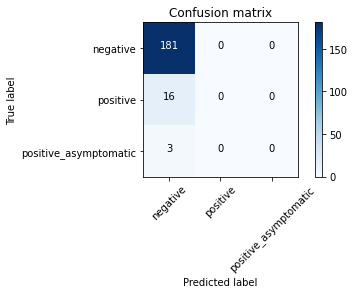

In [145]:
pred1 = clf.predict(xt1)
score1 = metrics.accuracy_score(yt1, pred1)
print("accuracy: %0.3f" % score1)
cm = metrics.confusion_matrix(yt1, pred1)
print(metrics.classification_report(y_test,pred))
plot_confusion_matrix(cm, classes=['negative', 'positive','positive_asymptomatic'])

In [146]:
len(y_test)

463

In [148]:
xt2 = audio_signal_test[200:463]
yt2 = y_test[200:463]

accuracy: 0.909
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       420
           1       0.00      0.00      0.00        38
           2       0.00      0.00      0.00         5

    accuracy                           0.91       463
   macro avg       0.30      0.33      0.32       463
weighted avg       0.82      0.91      0.86       463

Confusion matrix, without normalization


C:\Users\MILIND\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\MILIND\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\MILIND\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


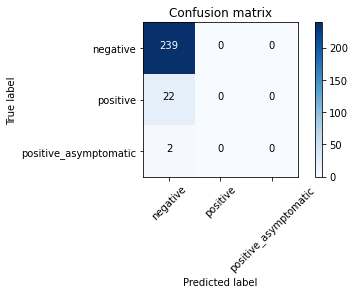

In [150]:
pred2 = clf.predict(xt2)
score2 = metrics.accuracy_score(yt2, pred2)
print("accuracy: %0.3f" % score2)
cm = metrics.confusion_matrix(yt2, pred2)
print(metrics.classification_report(y_test,pred))
plot_confusion_matrix(cm, classes=['negative', 'positive','positive_asymptomatic'])

## Using Random Forest Classifier

In [102]:
from sklearn.ensemble import RandomForestClassifier
RF_clf = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt')

accuracy: 0.907
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       420
           1       0.00      0.00      0.00        38
           2       0.00      0.00      0.00         5

    accuracy                           0.91       463
   macro avg       0.30      0.33      0.32       463
weighted avg       0.82      0.91      0.86       463

Confusion matrix, without normalization


C:\Users\MILIND\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\MILIND\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\MILIND\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


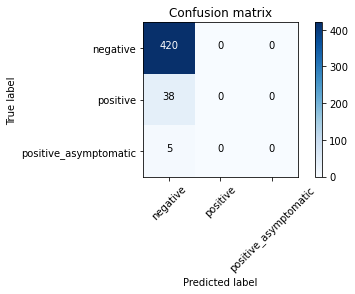

In [103]:
RF_clf.fit(audio_signal_train, y_train)
pred = RF_clf.predict(audio_signal_test)
RF_score = metrics.accuracy_score(y_test, pred)
print("accuracy: %0.3f" % RF_score)
cm = metrics.confusion_matrix(y_test, pred)
print(metrics.classification_report(y_test,pred))
plot_confusion_matrix(cm, classes=['negative', 'positive','positive_asymptomatic'])

## Using Logistic Regression

In [104]:
from sklearn.linear_model import LogisticRegression
LR_clf = LogisticRegression(random_state = 0)

C:\Users\MILIND\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy: 0.901
              precision    recall  f1-score   support

           0       0.91      0.99      0.95       420
           1       0.00      0.00      0.00        38
           2       0.00      0.00      0.00         5

    accuracy                           0.90       463
   macro avg       0.30      0.33      0.32       463
weighted avg       0.82      0.90      0.86       463

Confusion matrix, without normalization


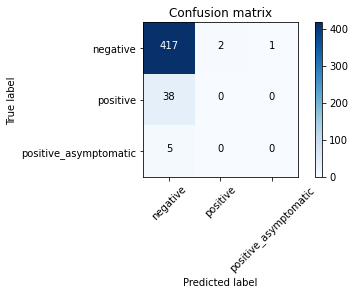

In [105]:
LR_clf.fit(audio_signal_train, y_train)
pred = LR_clf.predict(audio_signal_test)
LR_score = metrics.accuracy_score(y_test, pred)
print("accuracy: %0.3f" % LR_score)
cm = metrics.confusion_matrix(y_test, pred)
print(metrics.classification_report(y_test,pred))
plot_confusion_matrix(cm, classes=['negative', 'positive','positive_asymptomatic'])

## Applying Oversampling

In [106]:
from imblearn.over_sampling import RandomOverSampler

In [110]:
os = RandomOverSampler(sampling_strategy='auto', random_state=None)

In [111]:
from collections import Counter
rs=RandomOverSampler(0.75)
audio_signal_train_ns,y_train_ns=os.fit_sample(audio_signal_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

The number of classes before fit Counter({0: 884, 1: 45, 2: 9})
The number of classes after fit Counter({0: 884, 2: 884, 1: 884})


C:\Users\MILIND\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.75 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "


In [112]:
from sklearn.ensemble import RandomForestClassifier
RF_clf = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt')

accuracy: 0.905
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       420
           1       0.00      0.00      0.00        38
           2       0.00      0.00      0.00         5

    accuracy                           0.90       463
   macro avg       0.30      0.33      0.32       463
weighted avg       0.82      0.90      0.86       463

Confusion matrix, without normalization


C:\Users\MILIND\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\MILIND\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\MILIND\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


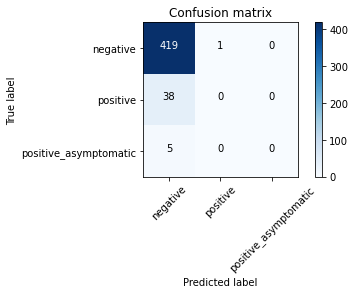

In [113]:
RF_clf.fit(audio_signal_train, y_train)
pred = RF_clf.predict(audio_signal_test)
RF_score = metrics.accuracy_score(y_test, pred)
print("accuracy: %0.3f" % RF_score)
cm = metrics.confusion_matrix(y_test, pred)
print(metrics.classification_report(y_test,pred))
plot_confusion_matrix(cm, classes=['negative', 'positive','positive_asymptomatic'])

In [116]:
RF_clf.predict([audio_signal[-1]])

array([0], dtype=int64)

In [118]:
predictions=[]

In [119]:
for i in audio_signal:
    pred = RF_clf.predict([i])
    print(pred)
    predictions.append(pred)

[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]


In [203]:
from collections import Counter
os=RandomOverSampler(0.75)
audio_signal_train_ns,y_train_ns=os.fit_sample(audio_signal_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

The number of classes before fit Counter({0: 884, 1: 54})
The number of classes after fit Counter({0: 884, 1: 663})


C:\Users\MILIND\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.75 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "


## mfcc arrays in a csv file

In [151]:
df=pd.read_csv(r"I:\Covsound\COVDATA\dfmc.csv")

In [152]:
df.drop(columns=['Unnamed: 0.1','Unnamed: 0'],inplace=True)

In [153]:
df['covid_status'].unique()

array(['healthy', 'resp_illness_not_identified',
       'no_resp_illness_exposed', 'positive_mild', 'recovered_full',
       'positive_moderate', 'positive_asymp'], dtype=object)

In [154]:
df['covid_status'].replace(to_replace='healthy',value=0,inplace=True)

In [155]:
df['covid_status'].replace(to_replace='resp_illness_not_identified',value=0,inplace=True)

In [156]:
df['covid_status'].replace(to_replace='no_resp_illness_exposed',value=0,inplace=True)

In [157]:
df['covid_status'].replace(to_replace='positive_mild',value=1,inplace=True)

In [158]:
df['covid_status'].replace(to_replace='positive_moderate',value=1,inplace=True)

In [159]:
df['covid_status'].replace(to_replace='recovered_full',value=0,inplace=True)

In [160]:
df['covid_status'].replace(to_replace='positive_asymp',value=2,inplace=True)

In [161]:
df

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,covid_status
0,-393.100922,65.786224,17.106403,10.076809,10.791719,14.729350,-3.476004,-1.066770,-8.556335,6.732553,...,-2.226569,-1.075148,-1.991221,-1.231300,-1.260011,-1.660500,-0.378481,-0.772591,0.160335,0
1,-653.722412,27.072189,1.040741,8.740667,-7.706120,0.709736,-9.846657,-3.474672,-4.876379,-5.076571,...,-1.324547,-0.248390,-0.485403,-0.572252,-0.684025,0.620175,-0.398123,0.041420,-0.642441,0
2,-485.850464,29.984562,-33.330070,1.851031,-9.353327,-3.240518,0.042252,0.824445,-7.010202,-0.540064,...,-0.854663,-0.111709,-1.441574,1.190670,-0.637143,-0.721766,-0.458637,-1.326425,-0.829785,0
3,-431.635284,102.562515,-38.693794,-2.759346,8.851647,-7.976239,-27.129074,-0.556504,-10.044340,10.496982,...,-2.410072,-2.227463,3.851163,-0.269491,-2.823455,1.951834,-0.158582,1.827814,-3.774132,0
4,-397.403137,81.400543,6.378272,18.352776,-0.504036,11.869080,11.090445,5.194029,-13.581419,3.291582,...,-4.442239,2.092822,-1.449335,-6.204978,-1.435069,-6.362640,-0.607799,-6.144275,-3.309297,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1396,-378.403076,87.434410,-22.533300,4.555630,-32.161953,5.730313,-16.484436,0.065433,-8.840619,17.886755,...,-1.143967,3.310062,-3.387465,-3.405476,-1.765519,-5.148687,-2.743734,-2.768719,-2.602690,0
1397,-503.495728,58.258343,-7.977168,-8.722877,-14.367609,-5.327643,-11.334870,-8.600513,-11.359137,-2.248497,...,-3.705540,-3.256352,-0.009836,-3.312069,0.869451,0.909564,-0.329833,0.416906,0.259506,0
1398,-475.429199,74.497856,-42.200142,7.030431,-34.324299,-11.239775,-11.542623,-10.668515,-7.302673,3.260601,...,0.108463,-1.479234,-1.890496,-1.372819,3.447172,-1.096427,1.302673,3.011770,1.857025,0
1399,-308.258850,62.547729,-14.601794,25.602108,10.936547,7.518115,-20.643559,0.039409,-11.368946,11.085368,...,-2.192831,0.171049,-3.557161,-0.928145,0.368347,-2.437173,-0.007660,0.646301,-0.182313,0


In [162]:
#df.to_csv(r"I:\Covsound\COVDATA\new.csv")

## Training the model using random forest classifier

In [163]:
y = df['covid_status']

In [164]:
X=df.drop('covid_status',axis=1)

In [165]:
from sklearn.model_selection import train_test_split

In [166]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.33, random_state=0)

In [167]:
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
import numpy as np
import itertools

In [168]:
from imblearn.over_sampling import RandomOverSampler

In [169]:
os = RandomOverSampler(sampling_strategy='dict', random_state=dict)

In [170]:
os = RandomOverSampler(sampling_strategy='auto', random_state=None)

X_train_ns,y_train_ns=os.fit_sample(X_train,y_train)



In [171]:
from collections import Counter
ps=RandomOverSampler(0.75)
X_train_ns,y_train_ns=os.fit_sample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

The number of classes before fit Counter({0: 884, 1: 45, 2: 9})
The number of classes after fit Counter({0: 884, 2: 884, 1: 884})


C:\Users\MILIND\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.75 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "


In [172]:
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

The number of classes before fit Counter({0: 884, 1: 45, 2: 9})
The number of classes after fit Counter({0: 884, 2: 884, 1: 884})


In [173]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_train_ns,y_train_ns)

RandomForestClassifier()

In [174]:

y_pred=classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))

print(classification_report(y_test,y_pred))

[[420   0   0]
 [ 38   0   0]
 [  5   0   0]]
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       420
           1       0.00      0.00      0.00        38
           2       0.00      0.00      0.00         5

    accuracy                           0.91       463
   macro avg       0.30      0.33      0.32       463
weighted avg       0.82      0.91      0.86       463



C:\Users\MILIND\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\MILIND\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\MILIND\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [175]:
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

## Cross Validation

In [182]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [177]:
10.0 **np.arange(-2,3)

array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])

In [179]:
log_class=LogisticRegression()
grid={'C':10.0 **np.arange(-2,3),'penalty':['l1','l2']}
cv=KFold(n_splits=5,random_state=None,shuffle=False)

In [180]:

clf=GridSearchCV(log_class,grid,cv=cv,n_jobs=-1,scoring='f1_macro')
clf.fit(X_train,y_train)

C:\Users\MILIND\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan 0.33193681        nan 0.33098752        nan 0.33099646
        nan 0.34468605        nan 0.33117414]
  warnings.warn(
C:\Users\MILIND\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2']},
             scoring='f1_macro')

In [183]:
y_pred=clf.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))


[[417   2   1]
 [ 38   0   0]
 [  5   0   0]]
0.9006479481641468
              precision    recall  f1-score   support

           0       0.91      0.99      0.95       420
           1       0.00      0.00      0.00        38
           2       0.00      0.00      0.00         5

    accuracy                           0.90       463
   macro avg       0.30      0.33      0.32       463
weighted avg       0.82      0.90      0.86       463

